In [23]:
import psycopg2
conn = psycopg2.connect("dbname=internship_360digitmg user=postgres password=Nischith@143")
cur=conn.cursor()
cur.execute('''SELECT * FROM abc''')
result=cur.fetchmany()
print('\n')
print(result)



[('Sale', '12018098765', 'Specialisation6', 'Department1', '6-1-2022', 1, 0, 55.406, 59.26, 0.0, 'Form1', 'ZINC ACETATE 20MG/5ML SYP', 'SYRUP & SUSPENSION', 'VITAMINS & MINERALS')]


In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.options.display.width=25000
pd.set_option('display.expand_frame_repr', False)
df=pd.read_sql('''SELECT * FROM abc''',conn);
df.head()

C:\Users\NISCHITH G S\AppData\Local\Temp\ipykernel_25960\370669978.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df=pd.read_sql('''SELECT * FROM abc''',conn);


typeofsales   patient_id    specialisation         dept  dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname              subcat                                subcat1
0        Sale  12018098765   Specialisation6  Department1    6-1-2022         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION                    VITAMINS & MINERALS
1        Sale  12018103897   Specialisation7  Department1   7/23/2022         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS                        ANTI-INFECTIVES
2        Sale  12018101123   Specialisation2  Department3   6/23/2022         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3        Sale  12018079281  Specialisation40  Department1   3/17/2022         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS
4        Sale  12018117928   Specialisation5  Department1  12/21/2022         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG  TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM

In [25]:
df.shape

(14218, 14)

In [26]:
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation        653
drugname          1668
subcat            1668
subcat1           1692
dtype: int64

In [27]:
# Filter rows where the 'typeofsales' column is 'return'
return_sales_data = df[df['typeofsales'] == 'Return']
# Display the resulting DataFrame
return_sales_data.head(10)
return_sales_data.typeofsales.value_counts()

Return    1681
Name: typeofsales, dtype: int64

In [28]:
sales_data = df[df['typeofsales']=='Sale']
(sales_data.head(10))

typeofsales   patient_id    specialisation         dept  dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname                        subcat                                subcat1
0         Sale  12018098765   Specialisation6  Department1    6-1-2022         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP            SYRUP & SUSPENSION                    VITAMINS & MINERALS
1         Sale  12018103897   Specialisation7  Department1   7/23/2022         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG                    INJECTIONS                        ANTI-INFECTIVES
2         Sale  12018101123   Specialisation2  Department3   6/23/2022         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML                    INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
3         Sale  12018079281  Specialisation40  Department1   3/17/2022         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION                    INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS
4         Sale  12018117928   Specialisation5  Department1  12/21/2022         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG            TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM
6         Sale  12018097585   Specialisation2  Department1   5/22/2022         1               0      41.862       42.218     0.0       Form1                 FUROSEMIDE 10MG/ML                    INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM
7         Sale  12018077721   Specialisation4  Department1   1-12-2022         3               0      60.026      142.752     0.0       Form1          SODIUM CHLORIDE IVF 100ML  IV FLUIDS, ELECTROLYTES, TPN  INTRAVENOUS & OTHER STERILE SOLUTIONS
8         Sale  12018096500   Specialisation4  Department2   8/24/2022         2               0      49.856       94.000     0.0       Form2        SODIUM BICARBONATE 8.5% INJ                    INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS
9         Sale  12018071649   Specialisation4  Department1   8/31/2022         1               0     258.860      319.800     0.0       Form1          PEPTIDE BASED DIET POWDER       NUTRITIONAL SUPPLEMENTS                              NUTRITION
10        Sale  12018074894   Specialisation7  Department1   10-4-2022         3               0     114.592      290.400     0.0       Form1    MULTIPLE ELECTROLYTES 500ML IVF  IV FLUIDS, ELECTROLYTES, TPN  INTRAVENOUS & OTHER STERILE SOLUTIONS

In [29]:
sales_data.typeofsales.value_counts()
# 

Sale    12537
Name: typeofsales, dtype: int64

In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 14 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   typeofsales     14218 non-null  object 
 1   patient_id      14218 non-null  object 
 2   specialisation  14218 non-null  object 
 3   dept            14218 non-null  object 
 4   dateofbill      14218 non-null  object 
 5   quantity        14218 non-null  int64  
 6   returnquantity  14218 non-null  int64  
 7   final_cost      14218 non-null  float64
 8   final_sales     14218 non-null  float64
 9   rtnmrp          14218 non-null  float64
 10  formulation     13565 non-null  object 
 11  drugname        12550 non-null  object 
 12  subcat          12550 non-null  object 
 13  subcat1         12526 non-null  object 
dtypes: float64(3), int64(2), object(9)
memory usage: 1.5+ MB


In [31]:
df.columns

Index(['typeofsales', 'patient_id', 'specialisation', 'dept', 'dateofbill', 'quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp', 'formulation', 'drugname', 'subcat', 'subcat1'], dtype='object')

In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [33]:
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation        653
drugname          1668
subcat            1668
subcat1           1692
dtype: int64

In [34]:
df.dtypes[df.dtypes==object]

typeofsales       object
patient_id        object
specialisation    object
dept              object
dateofbill        object
formulation       object
drugname          object
subcat            object
subcat1           object
dtype: object

In [35]:
df.dtypes[df.dtypes.isin(['float64'])]

Series([], dtype: object)

# First Momemnt Business Descision

In [105]:
categorical_columns = ['typeofsales', 'specialisation', 'dept', 'formulation', 'drugname', 'subcat', 'subcat1']
for i in categorical_columns:
    print(df[i].value_counts())

Sale      12516
Return     1676
Name: typeofsales, dtype: int64
Specialisation4     3991
Specialisation7     2092
Specialisation3      734
Specialisation2      609
Specialisation8      591
Specialisation20     553
Specialisation11     516
Specialisation16     509
Specialisation1      439
Specialisation14     435
Specialisation5      388
Specialisation21     360
Specialisation26     342
Specialisation6      250
Specialisation23     249
Specialisation25     201
Specialisation31     183
Specialisation17     178
Specialisation9      158
Specialisation15     142
Specialisation42     132
Specialisation27     117
Specialisation10     107
Specialisation50     100
Specialisation33      99
Specialisation55      90
Specialisation43      74
Specialisation45      55
Specialisation34      53
Specialisation39      47
Specialisation41      44
Specialisation40      43
Specialisation28      34
Specialisation19      30
Specialisation48      24
Specialisation61      23
Specialisation12      23
Specialisat

C:\Users\NISCHITH G S\AppData\Local\Temp\ipykernel_25960\1933212881.py:18: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


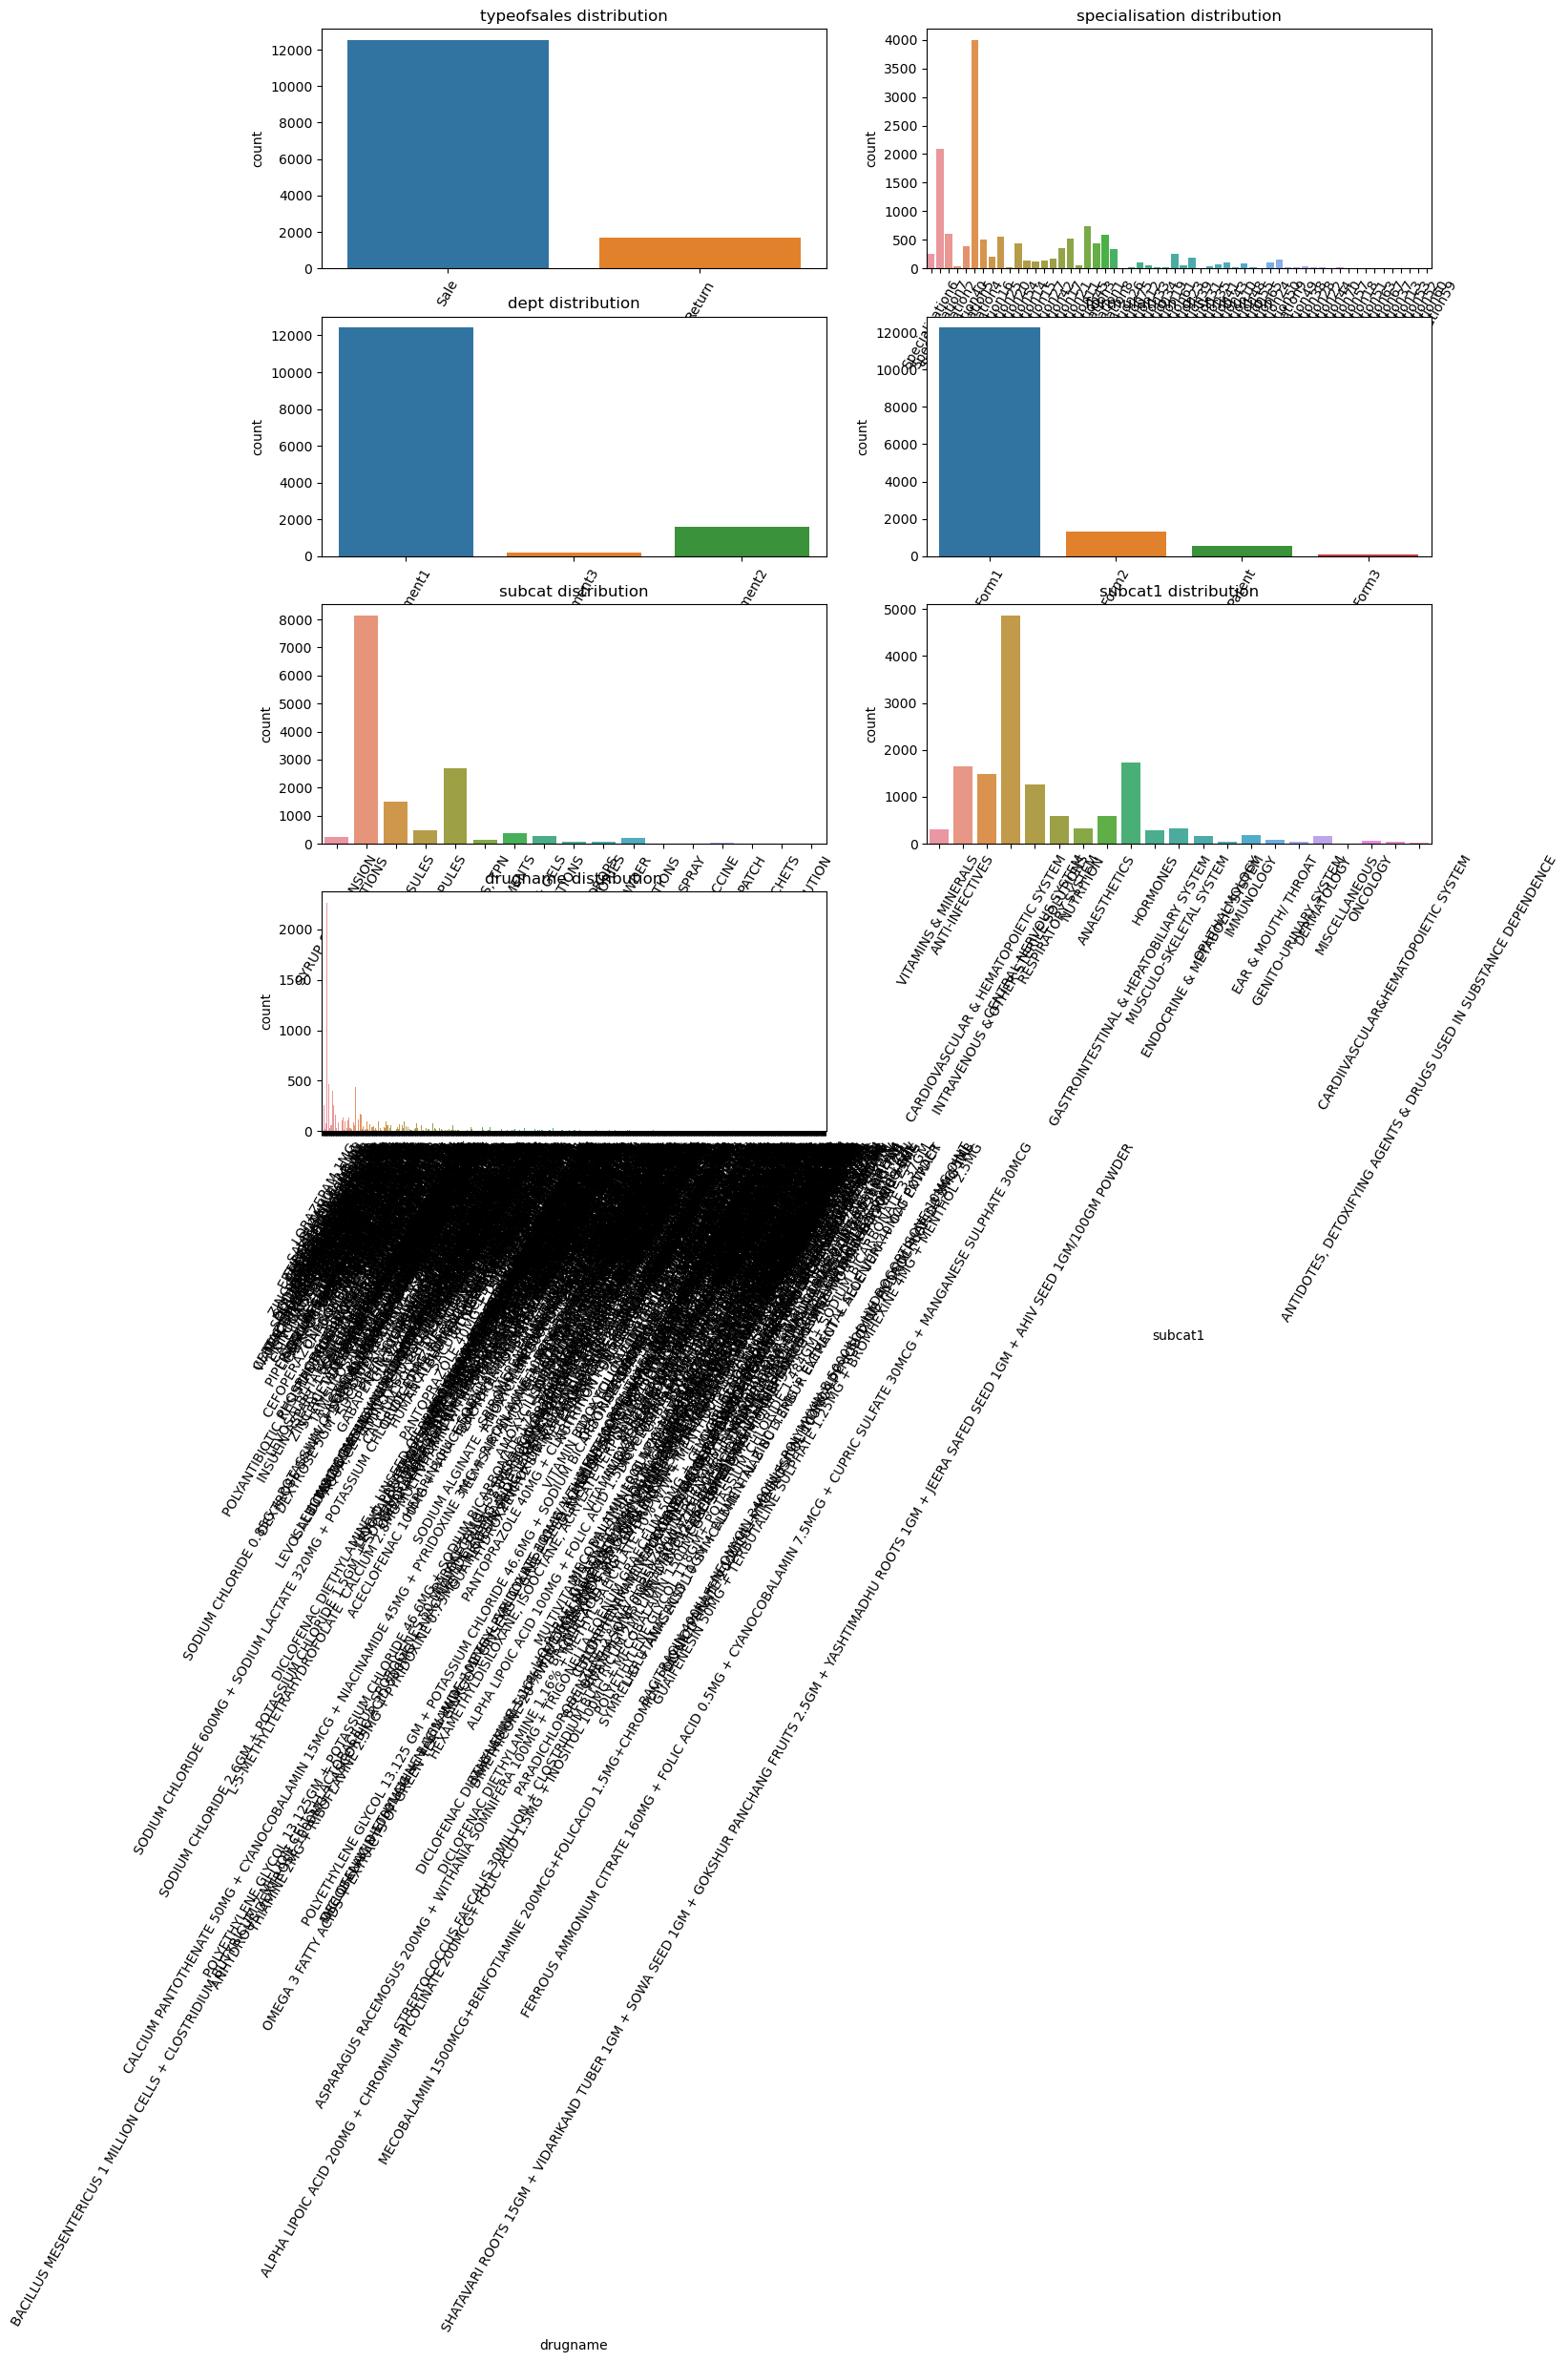

In [106]:
import matplotlib.pyplot as plt
import seaborn as sns

catagory_col = ['typeofsales', 'specialisation', 'dept', 'formulation', 'subcat', 'subcat1','drugname']
num_cols = 2
num_rows = (len(catagory_col) + 1) // num_cols

plt.figure(figsize=(15, 15))

for i, col in enumerate(catagory_col, 1):
    plt.subplot(num_rows, num_cols, i)
    sns.countplot(x=col, data=df)
    plt.title(f'{col} distribution')
    plt.xlabel(col)
    plt.ylabel('count')
    plt.xticks(rotation=60)

plt.tight_layout()
plt.show()


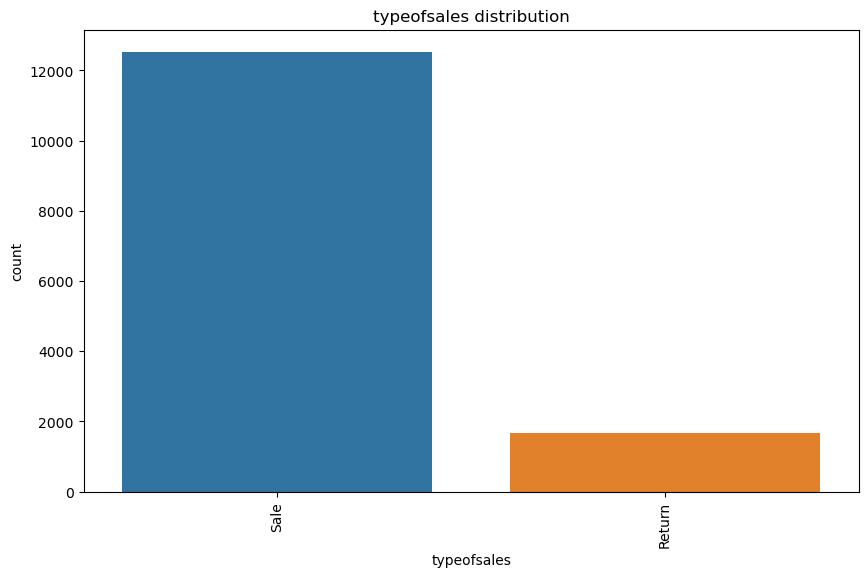

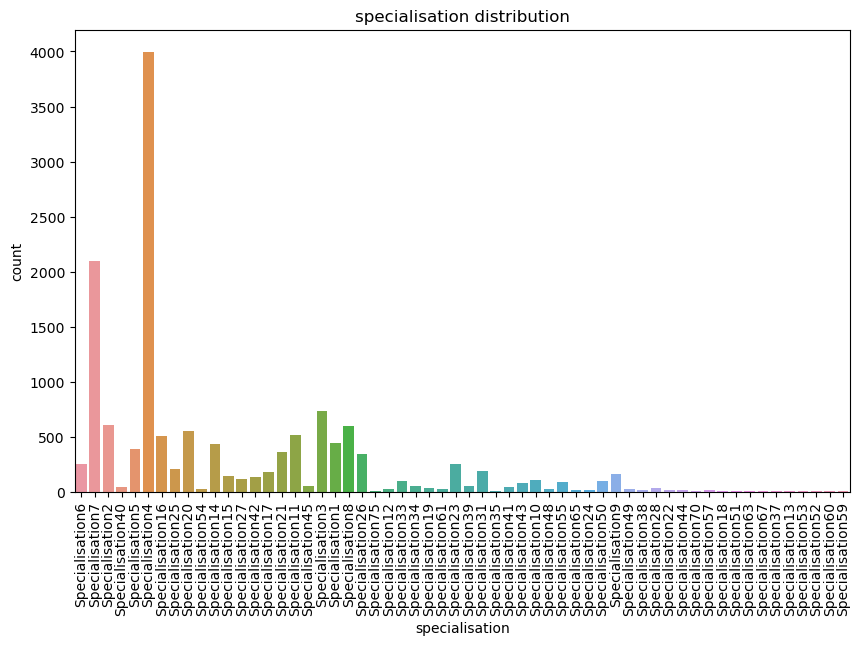

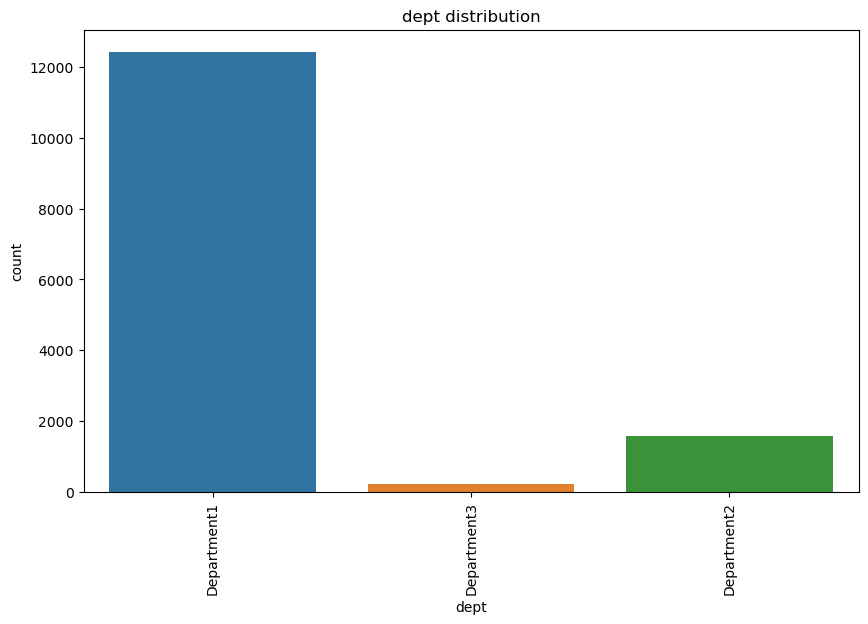

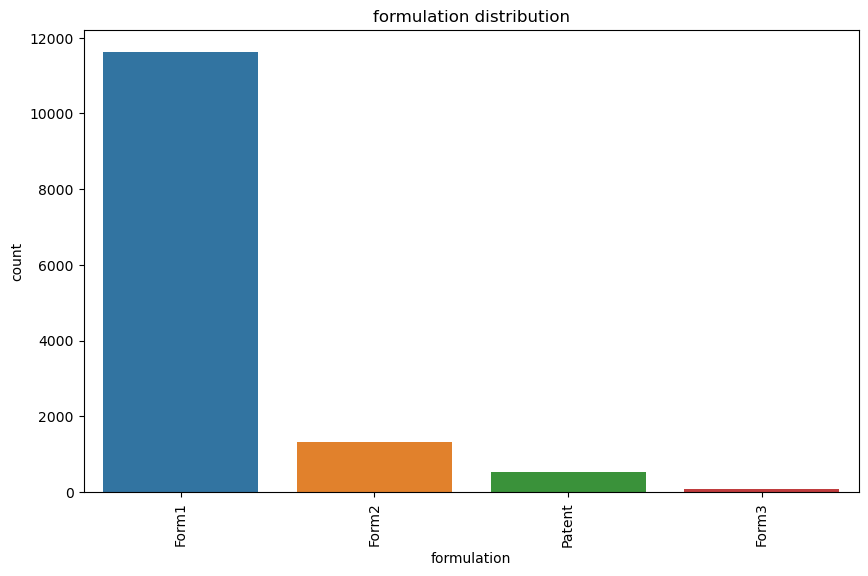

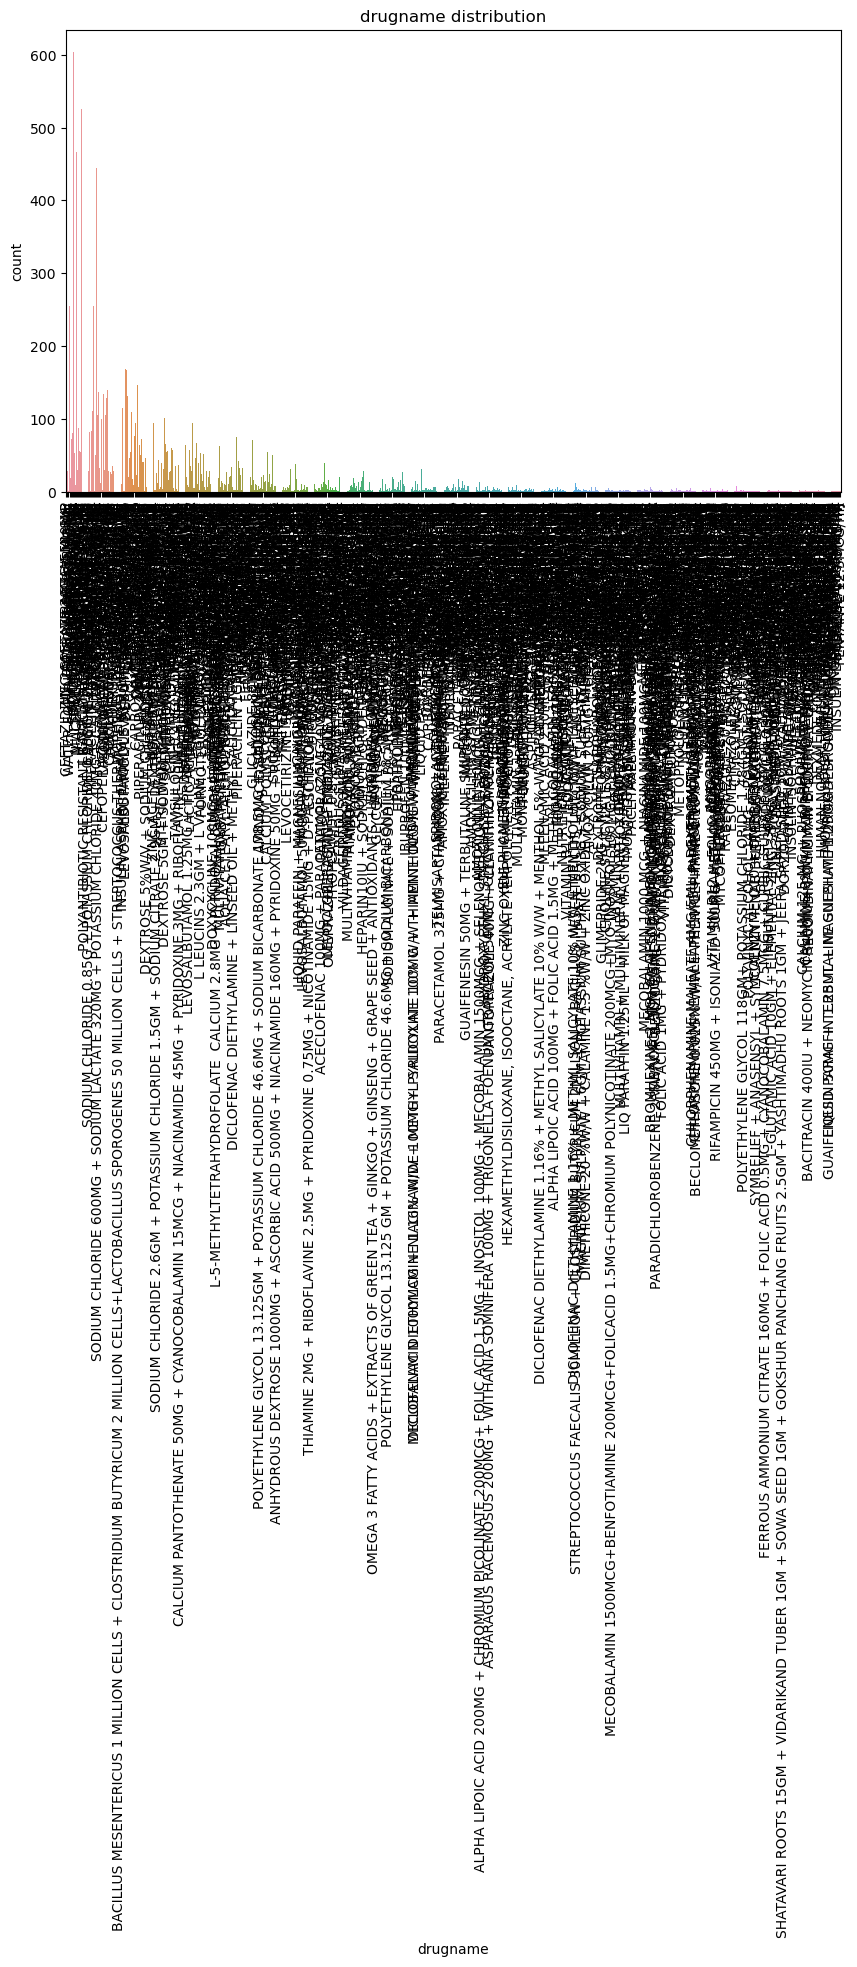

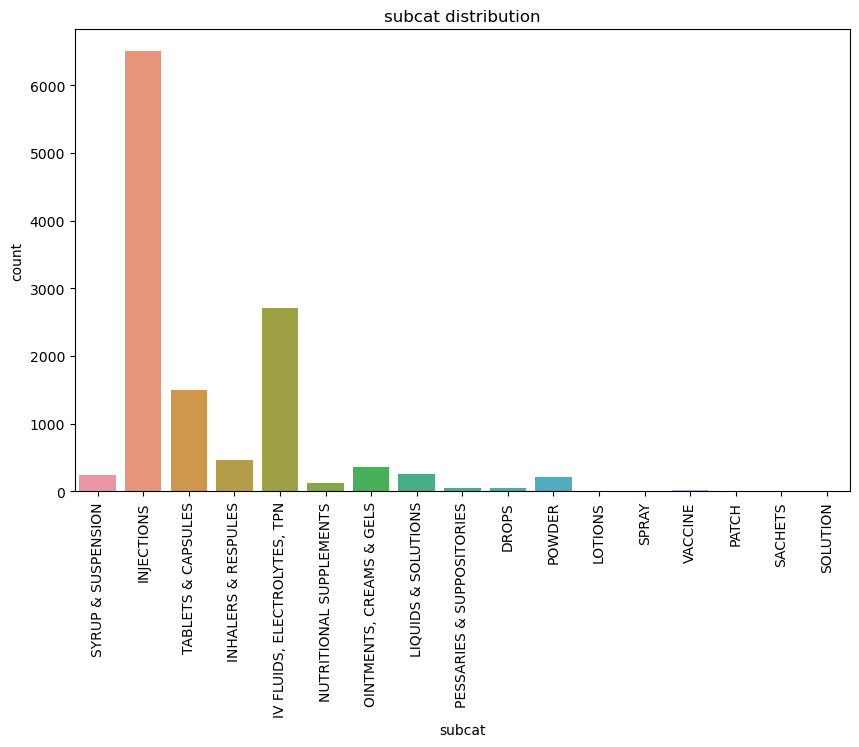

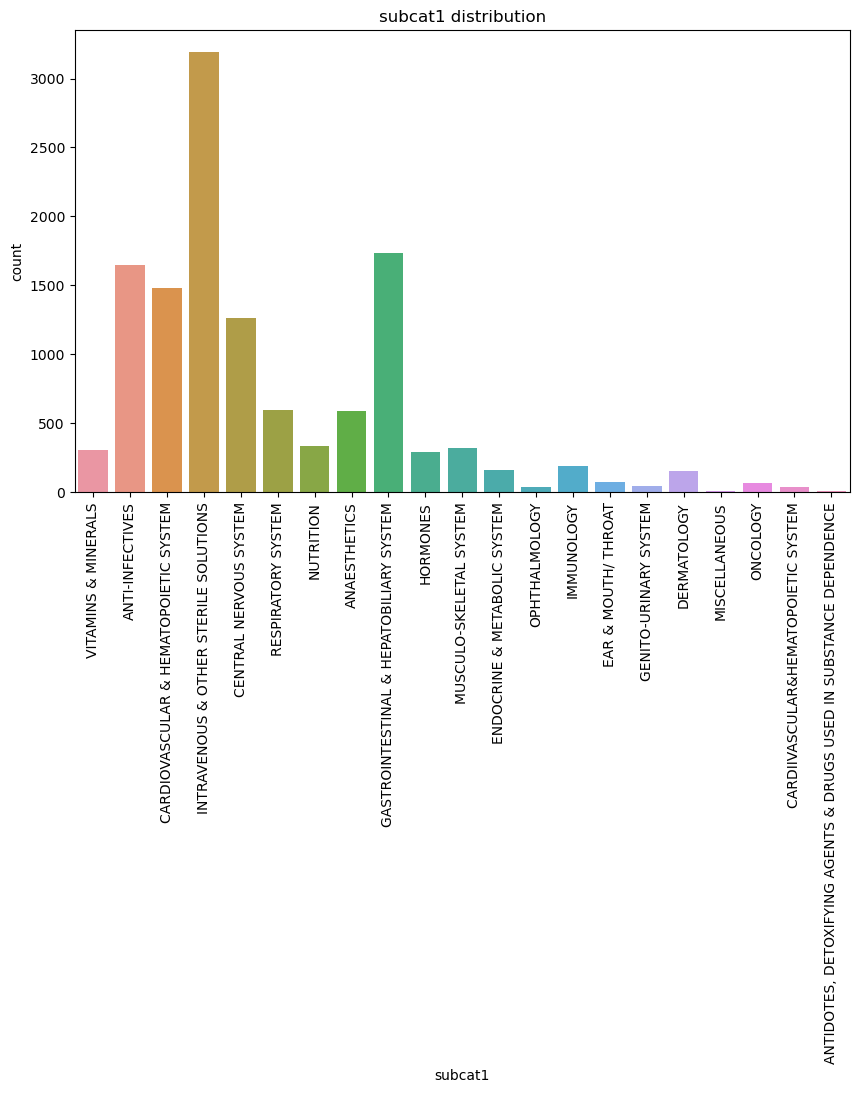

In [38]:
# univariate Analysis for Catogorical Columns
import matplotlib.pyplot as plt
catagory_col=['typeofsales', 'specialisation', 'dept', 'formulation', 'drugname', 'subcat', 'subcat1']
for i in catagory_col:
    plt.figure(figsize=[10,6])
    sns.countplot(x=i, data=df)
    plt.title(f'{i} distribution')
    plt.xlabel(i)
    plt.ylabel('count')
    plt.xticks(rotation=90)
    plt.show()
    # Sales are more than Returns
    # specialization-4 , Department-1 and Form-1 is the most attended 
    # SODIUM CHLORIDE IVF 100ML is the most saled drug in the given data
    

<Axes: >

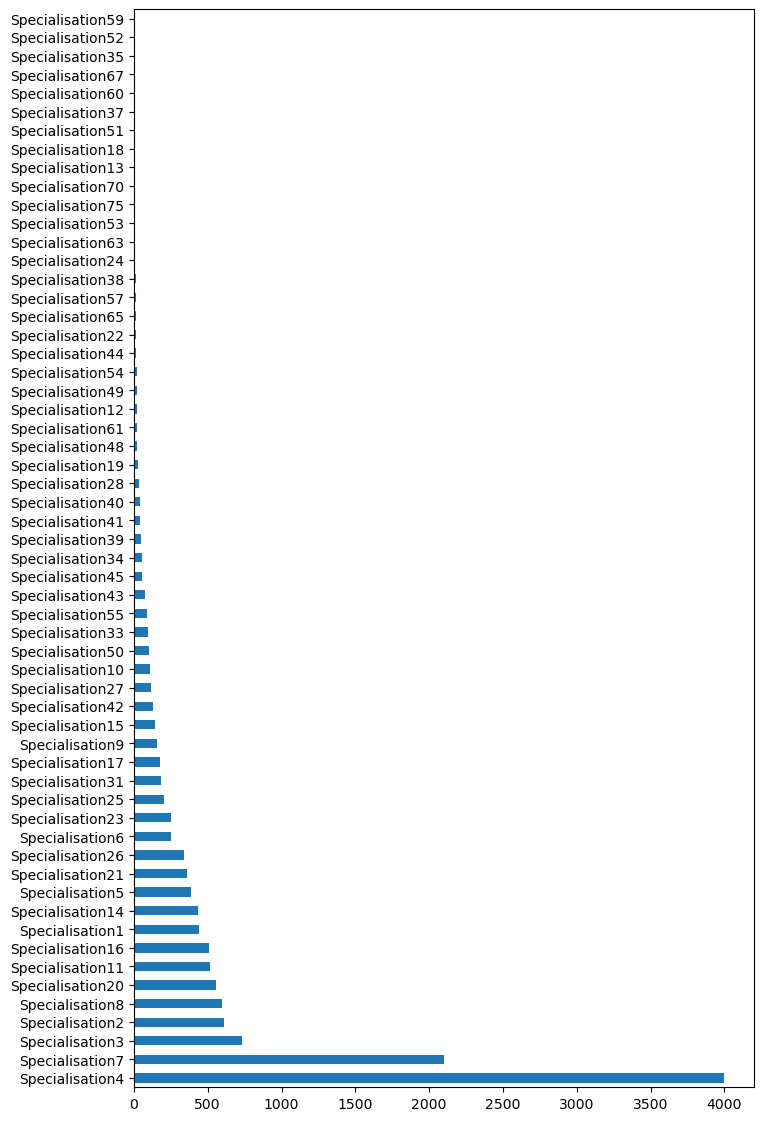

In [39]:
plt.figure(figsize=[8,14])
df['specialisation'].value_counts().plot.barh()

In [40]:
df['drugname'].value_counts()
# SODIUM CHLORIDE IVF 100ML is the Highest sold item
# In subcatagory Injections is the Highest sold item.
# In subcatagory-1 INTRAVENOUS & OTHER STERILE SOLUTIONS is the Highest sold item.


SODIUM CHLORIDE IVF 100ML                                                   604
SODIUM CHLORIDE 0.9%                                                        526
MULTIPLE ELECTROLYTES 500ML IVF                                             467
ONDANSETRON 2MG/ML                                                          444
PANTOPRAZOLE 40MG INJ                                                       441
                                                                           ... 
BASILIXIMAB 20 MG                                                             1
MULTIVITAMIN + MULTIMINERAL + ANTIOXIDANTS + METHYLCOBALAMIN 200ML SYRUP      1
ROPINIROLE 0.5MG TAB                                                          1
IRON SUCROSE 100MG INJ                                                        1
FENTANYL 12.5MCG/HR                                                           1
Name: drugname, Length: 751, dtype: int64

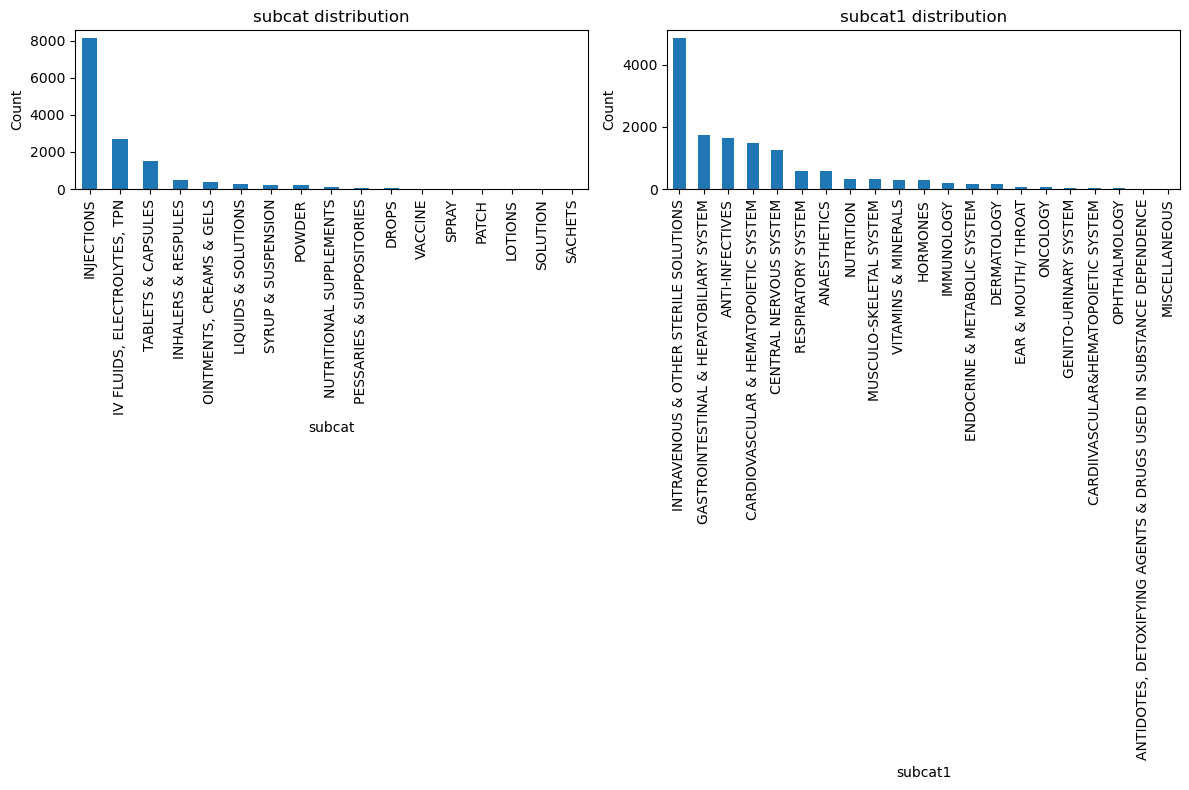

In [107]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))

plt.subplot(1, 2, 1)
df['subcat'].value_counts().plot.bar()
plt.title('subcat distribution')
plt.xlabel('subcat')
plt.ylabel('Count')

plt.subplot(1, 2, 2)
df['subcat1'].value_counts().plot.bar()
plt.title('subcat1 distribution')
plt.xlabel('subcat1')
plt.ylabel('Count')

plt.tight_layout()
plt.show()



In [42]:
df['subcat1'].value_counts()

INTRAVENOUS & OTHER STERILE SOLUTIONS                                 3192
GASTROINTESTINAL & HEPATOBILIARY SYSTEM                               1738
ANTI-INFECTIVES                                                       1647
CARDIOVASCULAR & HEMATOPOIETIC SYSTEM                                 1480
CENTRAL NERVOUS SYSTEM                                                1262
RESPIRATORY SYSTEM                                                     593
ANAESTHETICS                                                           591
NUTRITION                                                              331
MUSCULO-SKELETAL SYSTEM                                                322
VITAMINS & MINERALS                                                    303
HORMONES                                                               291
IMMUNOLOGY                                                             186
ENDOCRINE & METABOLIC SYSTEM                                           161
DERMATOLOGY              

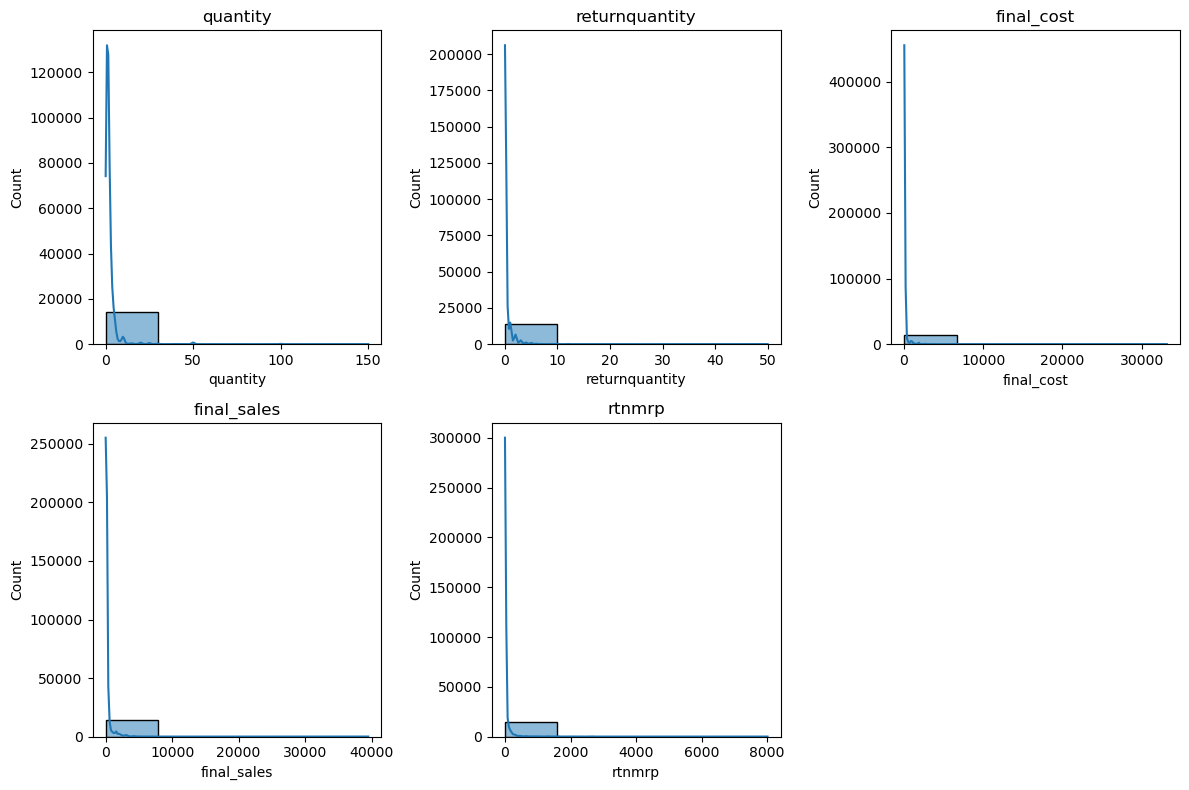

In [43]:
# Univariate analysis for numerical columns
numerical_columns = ['quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp']

plt.figure(figsize=(12,8))
for i , col in enumerate(numerical_columns,1):
    plt.subplot(2,3,i)
    sns.histplot(df[col],kde=True,bins=5)
    plt.title(col)
plt.tight_layout()
plt.show()

In [44]:
# Converting Date to standard Format
df['dateofbill']=pd.to_datetime(df['dateofbill'])
df['year']= df['dateofbill'].dt.year
df['month']= df['dateofbill'].dt.month
df.head()

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname              subcat                                subcat1  year  month
0        Sale  12018098765   Specialisation6  Department1 2022-06-01         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION                    VITAMINS & MINERALS  2022      6
1        Sale  12018103897   Specialisation7  Department1 2022-07-23         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS                        ANTI-INFECTIVES  2022      7
2        Sale  12018101123   Specialisation2  Department3 2022-06-23         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  2022      6
3        Sale  12018079281  Specialisation40  Department1 2022-03-17         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      3
4        Sale  12018117928   Specialisation5  Department1 2022-12-21         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG  TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM  2022     12

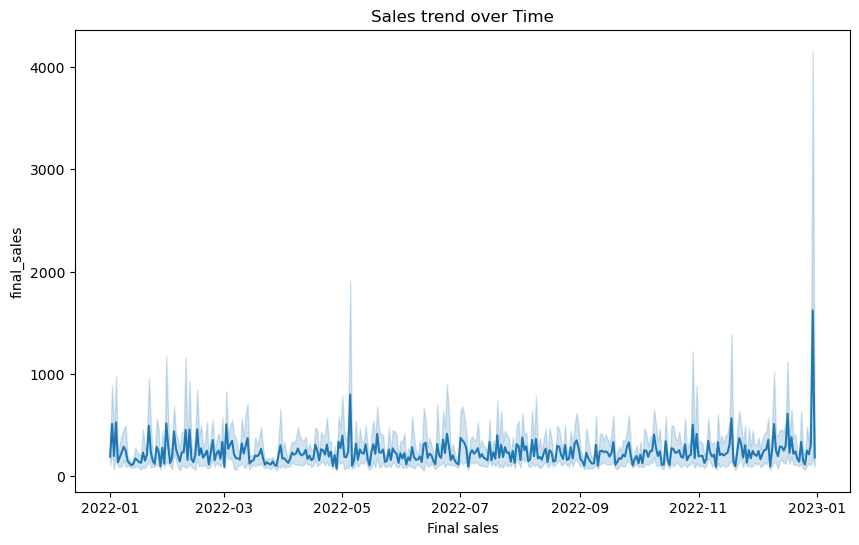

In [45]:
plt.figure(figsize=[10,6])
sns.lineplot(x = 'dateofbill', y='final_sales',data=df)
plt.title('Sales trend over Time')
plt.xlabel('Date')
plt.xlabel('Final sales')
plt.show()

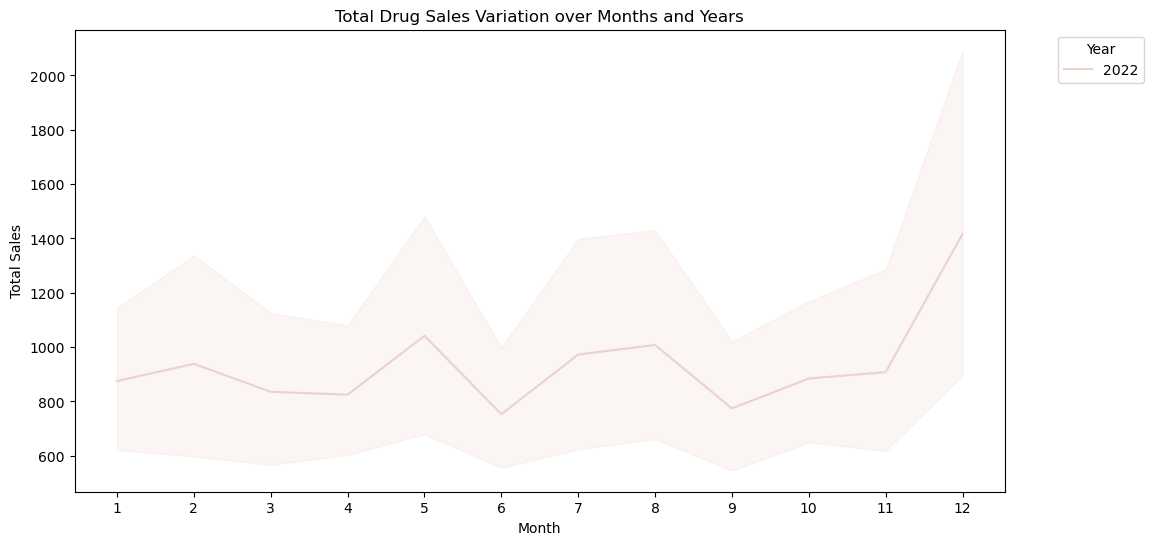

In [46]:
drug_sales_over_month_year = df.groupby(['drugname', 'year', 'month'])['final_sales'].sum().reset_index()

# Line plot: Total Drug Sales Variation over Months and Years
plt.figure(figsize=(12, 6))
sns.lineplot(x='month', y='final_sales', hue='year', data=drug_sales_over_month_year)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Total Drug Sales Variation over Months and Years')
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months (1 to 12)
plt.legend(title='Year', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()
# The total sales is maximum at the Last month of the year(December)


In [47]:
df.head()

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname              subcat                                subcat1  year  month
0        Sale  12018098765   Specialisation6  Department1 2022-06-01         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION                    VITAMINS & MINERALS  2022      6
1        Sale  12018103897   Specialisation7  Department1 2022-07-23         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS                        ANTI-INFECTIVES  2022      7
2        Sale  12018101123   Specialisation2  Department3 2022-06-23         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  2022      6
3        Sale  12018079281  Specialisation40  Department1 2022-03-17         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      3
4        Sale  12018117928   Specialisation5  Department1 2022-12-21         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG  TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM  2022     12

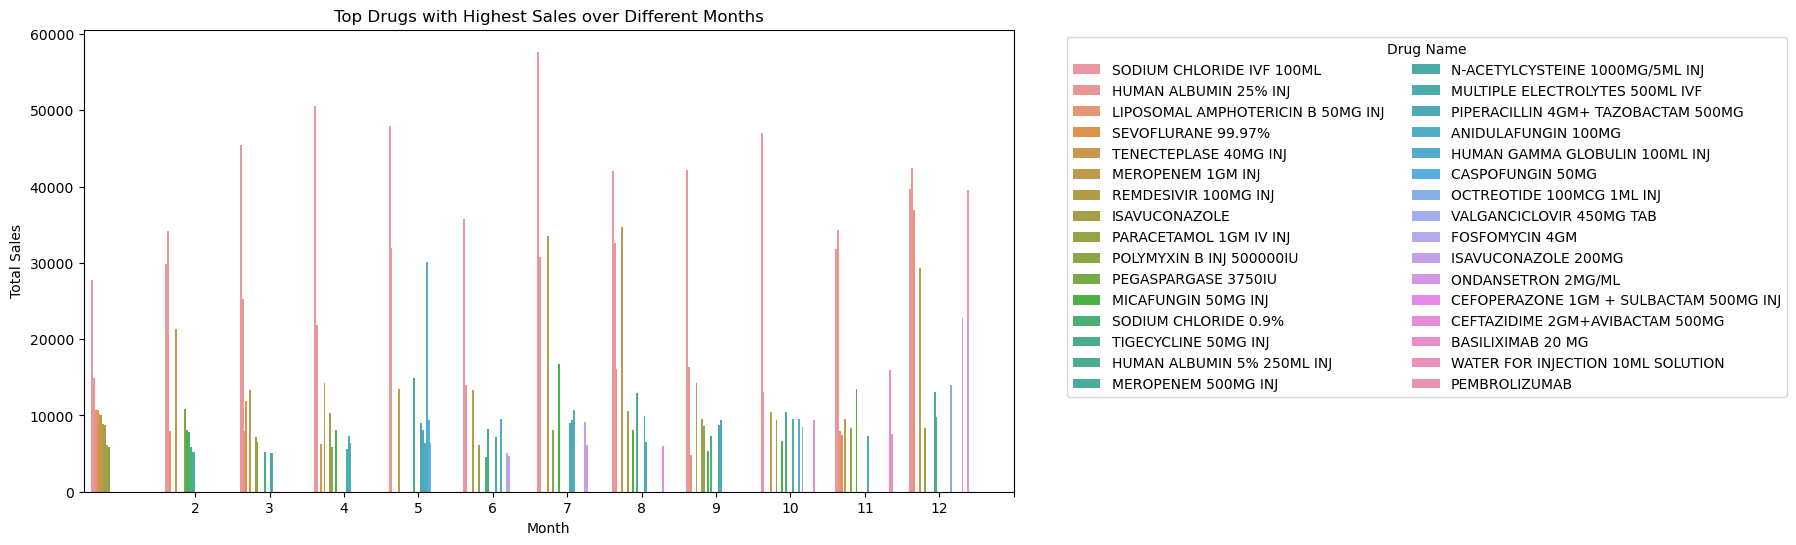

In [108]:
# Group the data by 'drugname' and calculate the total sales for each drug over different months
drug_sales_over_months = df.groupby(['drugname', 'month'])['final_sales'].sum().reset_index()

# Sort the drugs within each month based on total sales
drug_sales_over_months = drug_sales_over_months.sort_values(['month', 'final_sales'], ascending=[True, False])

# Get the top 10 drugs with the highest sales in each month
top_10_drugs_over_months = drug_sales_over_months.groupby('month').head(10)

# Bar plot: Top 10 Drugs with Highest Sales over Different Months
plt.figure(figsize=(12, 6))
sns.barplot(x='month', y='final_sales', hue='drugname', data=top_10_drugs_over_months)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Top Drugs with Highest Sales over Different Months')
plt.legend(title='Drug Name', bbox_to_anchor=(1.05, 1), loc='upper left', ncol=2)
plt.xticks(range(1, 13))  # Set x-axis ticks to represent months (1 to 12)
plt.show()
# NACl is the most saled item across the different months.

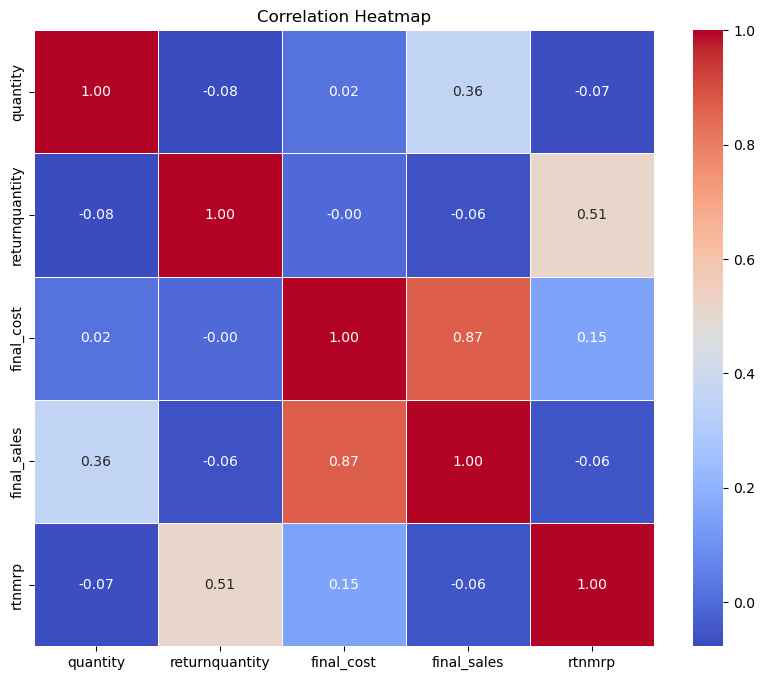

In [49]:
# Correlation heatmap
correlation_matrix = df[numerical_columns].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.show()
# variables associated with Return quantity and rtn mrp is poorly correlated
# To assess the correlation between 'Return quantity' and 'rtnmrp', you can use the correlation coefficient, such as the Pearson correlation coefficient. The correlation coefficient ranges from -1 to 1, where:
# A value of 1 indicates a perfect positive correlation (as one variable increases, the other increases proportionally).
# A value of -1 indicates a perfect negative correlation (as one variable increases, the other decreases proportionally).
# A value of 0 indicates no correlation (no linear relationship between the variables).

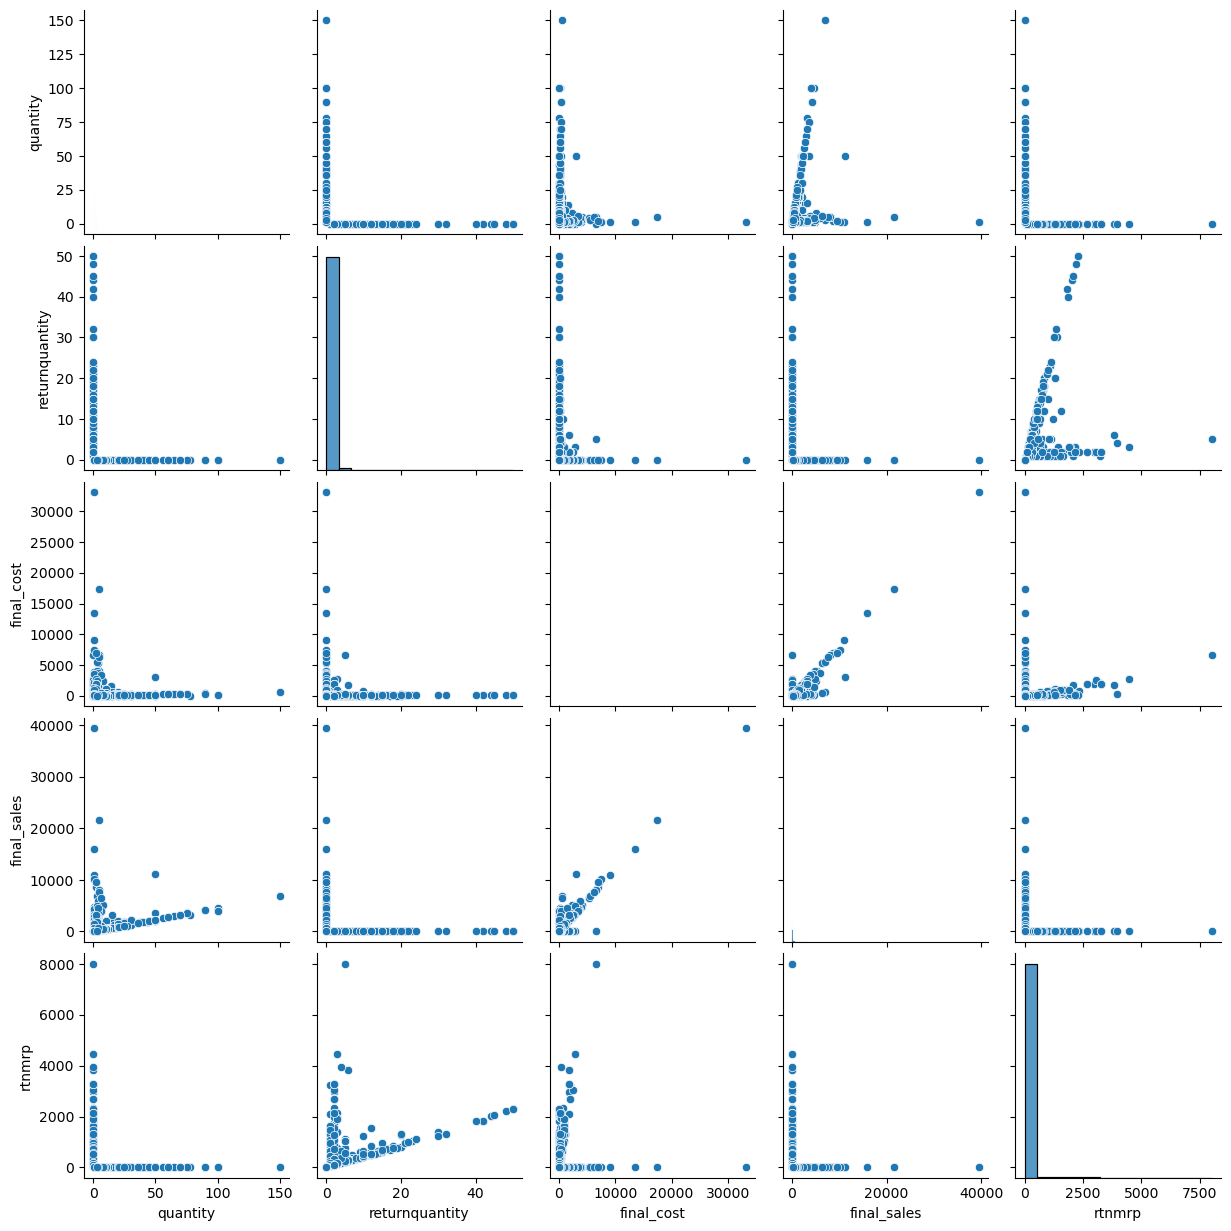

C:\Users\NISCHITH G S\AppData\Local\Temp\ipykernel_25960\3021500103.py:13: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


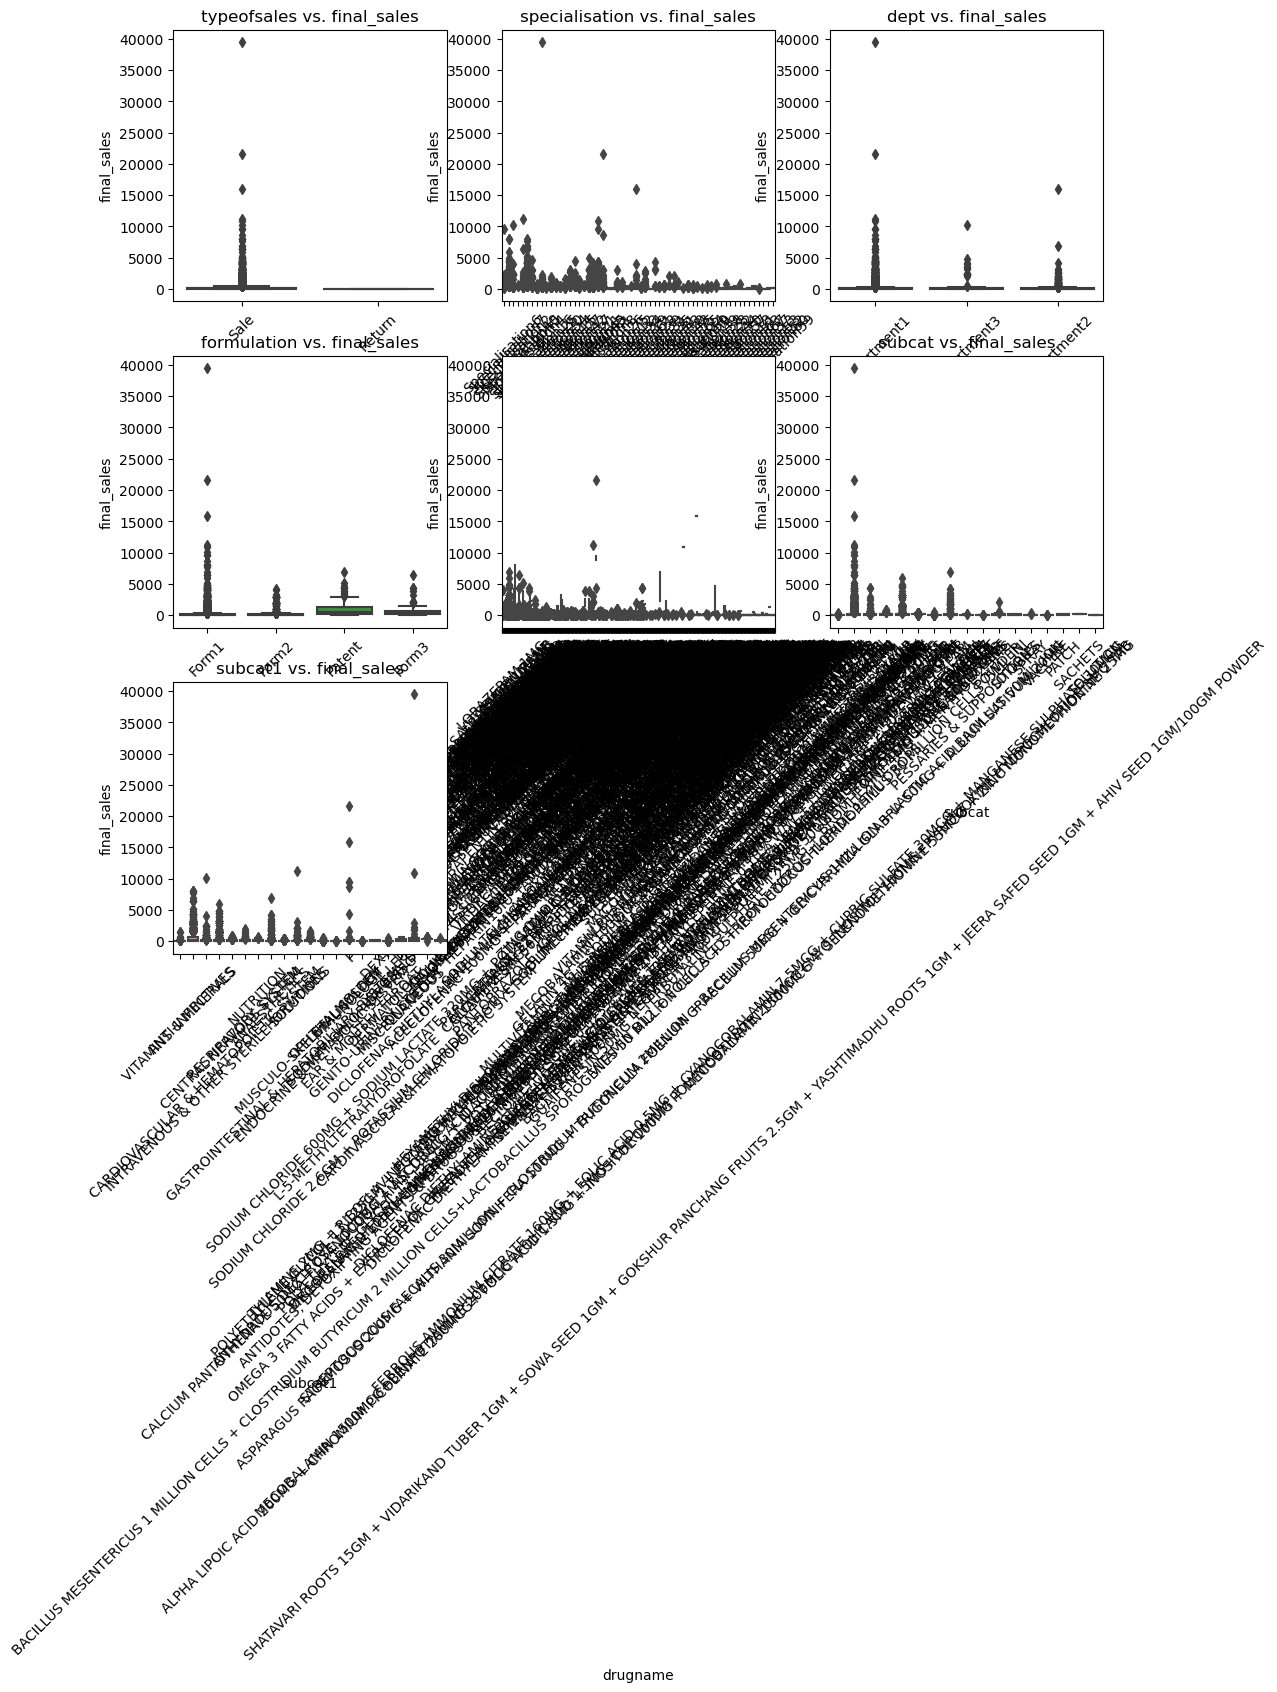

In [50]:
# Bivariate Analysis
# Bivariate analysis for numeric vs. numeric variables
sns.pairplot(df[numerical_columns])
plt.show()

# Bivariate analysis for categorical vs. numeric variables
plt.figure(figsize=(12, 12))
for i, col in enumerate(catagory_col, 1):
    plt.subplot(3, 3, i)
    sns.boxplot(x=col, y='final_sales', data=df)
    plt.title(f'{col} vs. final_sales')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# outliers are very few , compared to the main data points or values , which may affect the Median

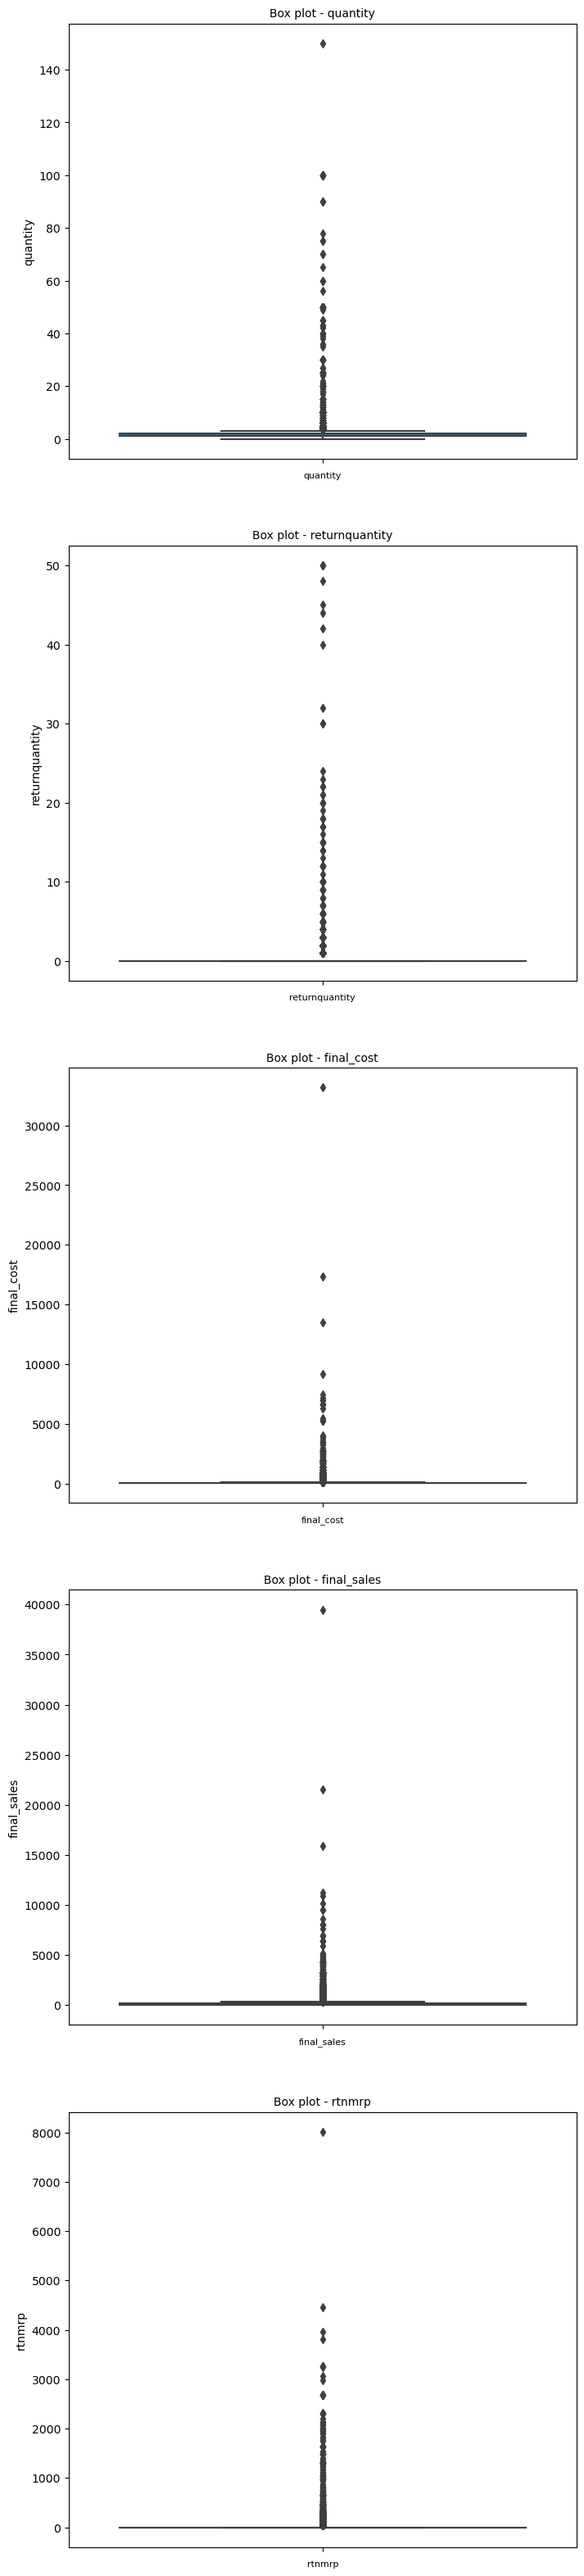

In [51]:
# outlier detection

fig, ax = plt.subplots(len(numerical_columns), figsize=(8,40))

for i, col_val in enumerate(numerical_columns):
        
    sns.boxplot(y=df[col_val], ax=ax[i])
    ax[i].set_title('Box plot - '+col_val, fontsize=10)
    ax[i].set_xlabel(col_val, fontsize=8)
    
plt.show()

In [52]:
# 1st bussiness Moment
catagory_col=['typeofsales', 'specialisation', 'dept', 'formulation', 'drugname', 'subcat', 'subcat1']
for i in catagory_col:
    print(df[i].mode())

0    Sale
Name: typeofsales, dtype: object
0    Specialisation4
Name: specialisation, dtype: object
0    Department1
Name: dept, dtype: object
0    Form1
Name: formulation, dtype: object
0    SODIUM CHLORIDE IVF 100ML
Name: drugname, dtype: object
0    INJECTIONS
Name: subcat, dtype: object
0    INTRAVENOUS & OTHER STERILE SOLUTIONS
Name: subcat1, dtype: object


In [53]:
numerical_columns = ['quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp']
for i in numerical_columns:
    print(f'The median of the column {i} is {df[i].median()}')

The median of the column quantity is 1.0
The median of the column returnquantity is 0.0
The median of the column final_cost is 53.65
The median of the column final_sales is 86.424
The median of the column rtnmrp is 0.0


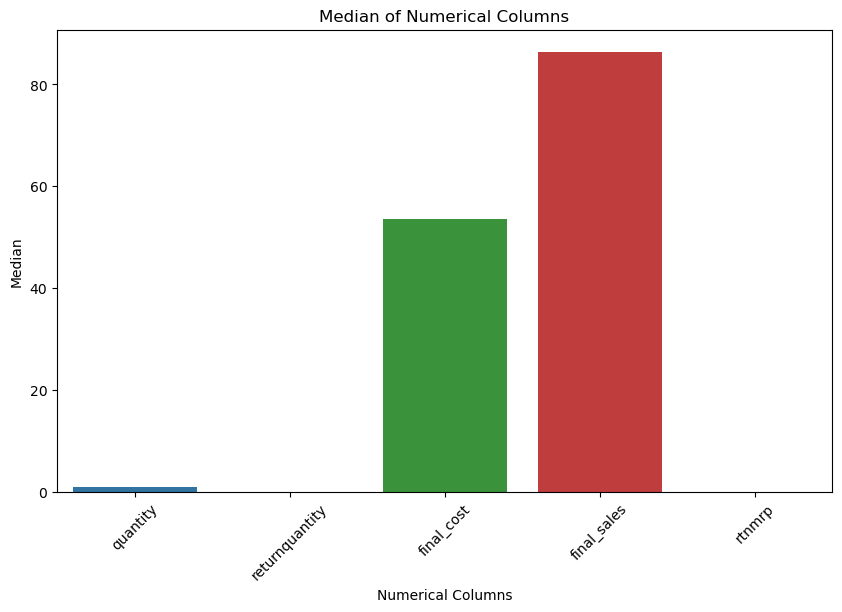

In [54]:
#  Calculate the median values
medians = {i: df[i].median() for i in numerical_columns}

# Step 2: Create a bar plot to visualize the median values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(medians.keys()), y=list(medians.values()))
plt.title('Median of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Median')
plt.xticks(rotation=45)
plt.show()
# final Sales has the highest median values, the final Sales column values is distributed evenly

In [55]:
for i in numerical_columns:
    print(f'The mean of the column {i} is {df[i].mean()}')

The mean of the column quantity is 2.2317484878323253
The mean of the column returnquantity is 0.2919538613025742
The mean of the column final_cost is 124.82395695597131
The mean of the column final_sales is 234.0383004642003
The mean of the column rtnmrp is 29.126754958503305


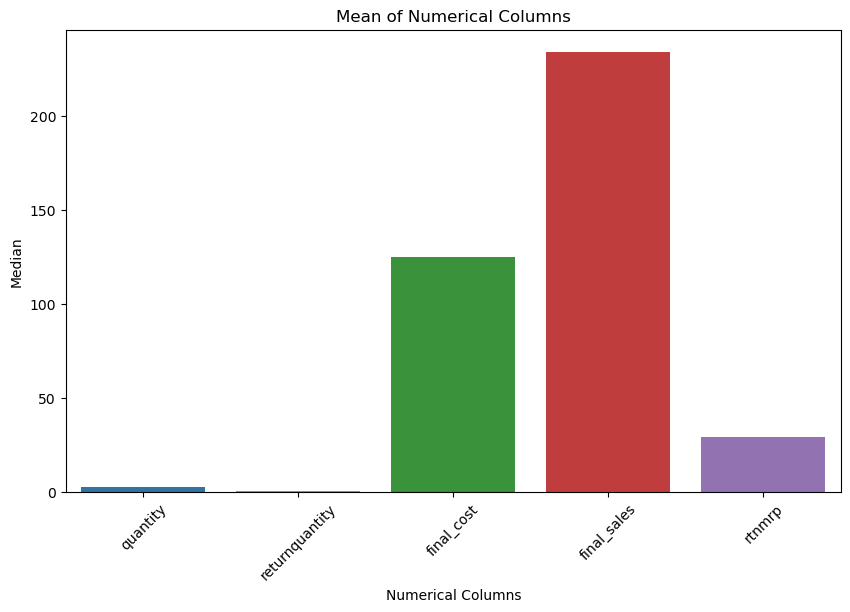

In [56]:
Mean = {i: df[i].mean() for i in numerical_columns}

# Step 2: Create a bar plot to visualize the median values
plt.figure(figsize=(10, 6))
sns.barplot(x=list(medians.keys()), y=list(Mean.values()))
plt.title('Mean of Numerical Columns')
plt.xlabel('Numerical Columns')
plt.ylabel('Median')
plt.xticks(rotation=45)
plt.show()
# final Sales has the highest mean values.

# Second Momemnt Business Descision

In [57]:
# 2nd Business Moment
for i in numerical_columns:
    print(f'The variance of the column {i} is {df[i].var()}')

The variance of the column quantity is 26.337862329088516
The variance of the column returnquantity is 2.700506402316936
The variance of the column final_cost is 216023.04539371582
The variance of the column final_sales is 450592.0976656482
The variance of the column rtnmrp is 33219.55893826877


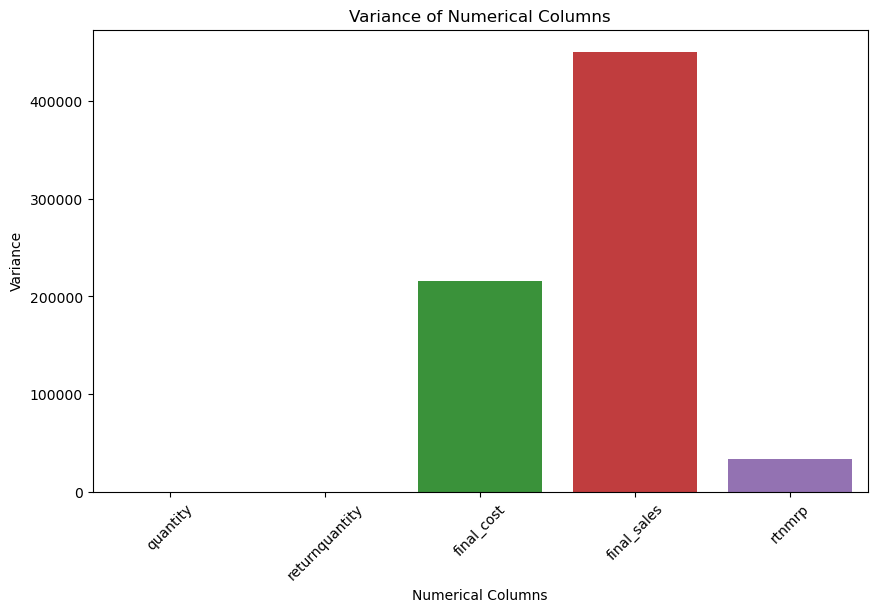

In [58]:
numerical_columns = ['quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp']
variances = [df[i].var() for i in numerical_columns]

# Create a DataFrame to store the variances and column names
variance_df = pd.DataFrame({'Column': numerical_columns, 'Variance': variances})

# Bar plot: Variance of Numerical Columns
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Variance', data=variance_df)
plt.xlabel('Numerical Columns')
plt.ylabel('Variance')
plt.title('Variance of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [59]:
for i in numerical_columns:
    print(f'The Standard Deviation of the column {i} is {df[i].std()}')

The Standard Deviation of the column quantity is 5.132042705306389
The Standard Deviation of the column returnquantity is 1.6433217586087443
The Standard Deviation of the column final_cost is 464.7827937797567
The Standard Deviation of the column final_sales is 671.2615717182447
The Standard Deviation of the column rtnmrp is 182.2623354899985


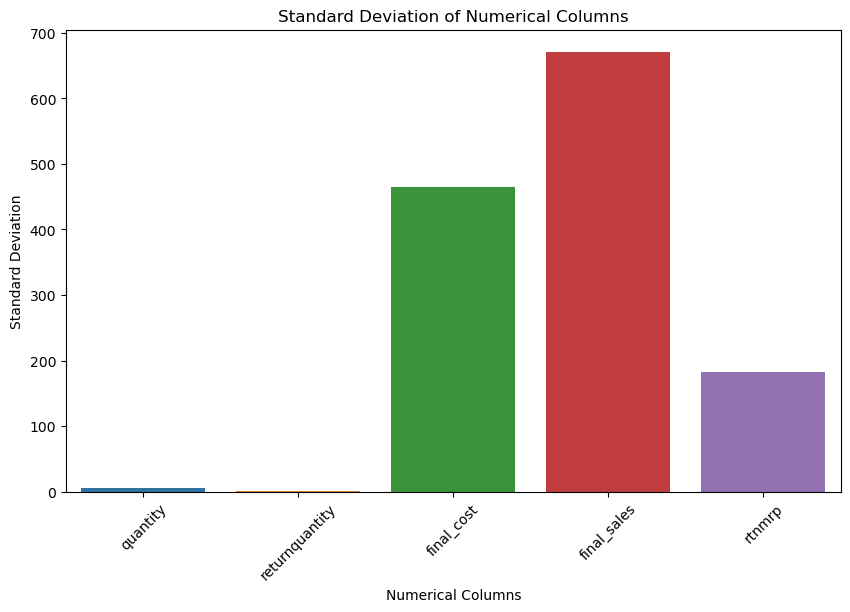

In [60]:
standard_deviations = [df[i].std() for i in numerical_columns]

# Create a DataFrame to store the standard deviations and column names
std_dev_df = pd.DataFrame({'Column': numerical_columns, 'Standard Deviation': standard_deviations})

# Bar plot: Standard Deviation of Numerical Columns
plt.figure(figsize=(10, 6))
sns.barplot(x='Column', y='Standard Deviation', data=std_dev_df)
plt.xlabel('Numerical Columns')
plt.ylabel('Standard Deviation')
plt.title('Standard Deviation of Numerical Columns')
plt.xticks(rotation=45)
plt.show()

In [61]:
for i in numerical_columns:
    print(f'The max and min of the column {i} is max = {df[i].max()}, min = {df[i].min()}')

The max and min of the column quantity is max = 150, min = 0
The max and min of the column returnquantity is max = 50, min = 0
The max and min of the column final_cost is max = 33178.0, min = 40.0
The max and min of the column final_sales is max = 39490.0, min = 0.0
The max and min of the column rtnmrp is max = 8014.0, min = 0.0


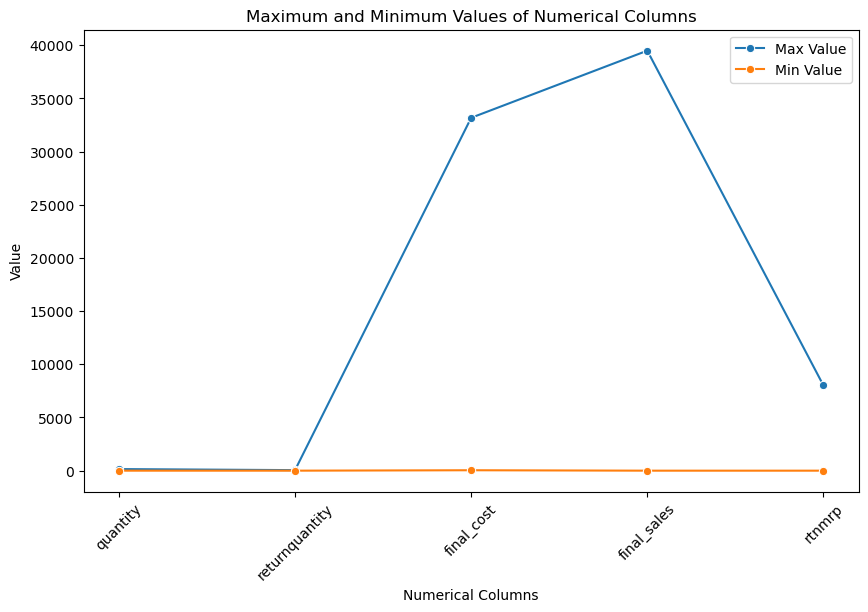

In [62]:
max_values = [df[i].max() for i in numerical_columns]
min_values = [df[i].min() for i in numerical_columns]

# Create a DataFrame to store the maximum and minimum values along with the column names
range_df = pd.DataFrame({'Column': numerical_columns, 'Max Value': max_values, 'Min Value': min_values})

# Line plot: Maximum and Minimum Values of Numerical Columns
plt.figure(figsize=(10, 6))
sns.lineplot(x='Column', y='Max Value', data=range_df, marker='o', label='Max Value')
sns.lineplot(x='Column', y='Min Value', data=range_df, marker='o', label='Min Value')
plt.xlabel('Numerical Columns')
plt.ylabel('Value')
plt.title('Maximum and Minimum Values of Numerical Columns')
plt.xticks(rotation=45)
plt.legend()
plt.show()

In [63]:
skewness_values = df[numerical_columns].skew()

# Print the skewness values
for col in numerical_columns:
    print(f"The skewness of the column {col} is: {skewness_values[col]:.2f}")

The skewness of the column quantity is: 11.34
The skewness of the column returnquantity is: 17.17
The skewness of the column final_cost is: 34.51
The skewness of the column final_sales is: 21.01
The skewness of the column rtnmrp is: 15.80


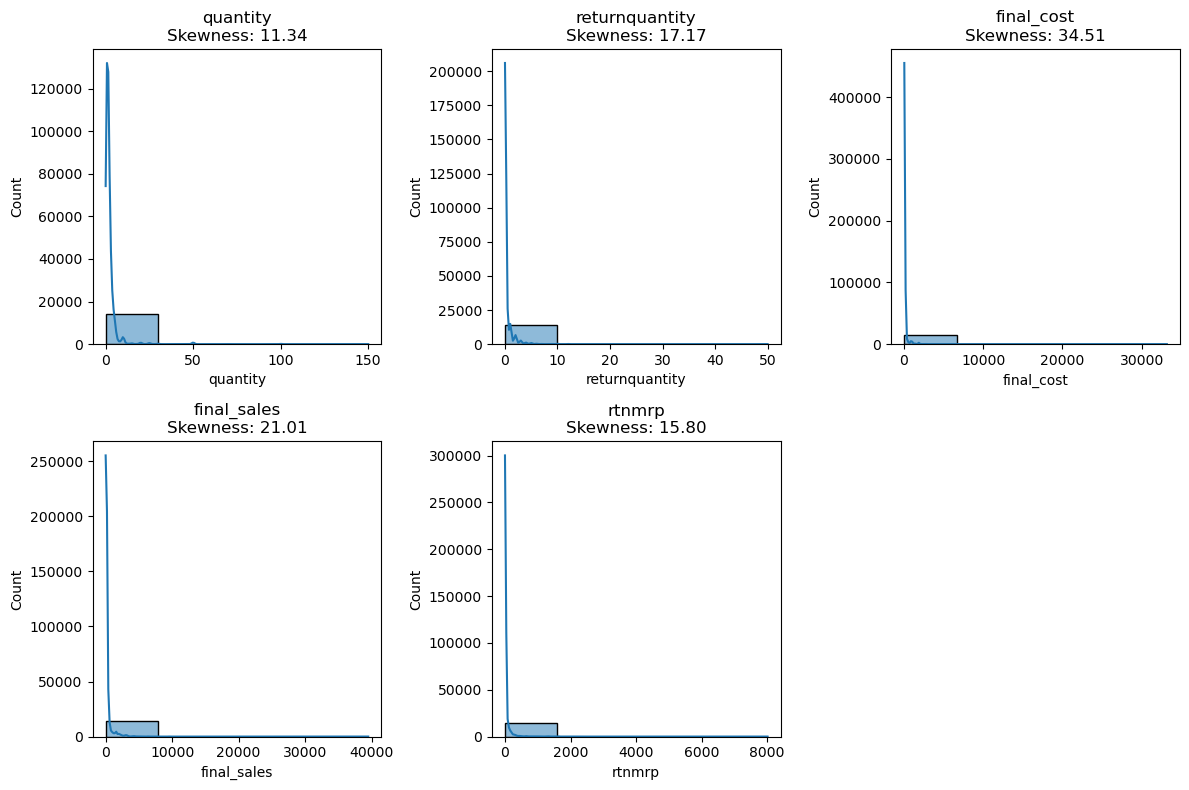

In [64]:
# to find Skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True,bins=5)
    plt.title(f'{col}\nSkewness: {df[col].skew():.2f}')
plt.tight_layout()
plt.show()

# Data Pre-processing

In [65]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14218 entries, 0 to 14217
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   typeofsales     14218 non-null  object        
 1   patient_id      14218 non-null  object        
 2   specialisation  14218 non-null  object        
 3   dept            14218 non-null  object        
 4   dateofbill      14218 non-null  datetime64[ns]
 5   quantity        14218 non-null  int64         
 6   returnquantity  14218 non-null  int64         
 7   final_cost      14218 non-null  float64       
 8   final_sales     14218 non-null  float64       
 9   rtnmrp          14218 non-null  float64       
 10  formulation     13565 non-null  object        
 11  drugname        12550 non-null  object        
 12  subcat          12550 non-null  object        
 13  subcat1         12526 non-null  object        
 14  year            14218 non-null  int64         
 15  mo

In [66]:
df.shape

(14218, 16)

In [67]:
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation        653
drugname          1668
subcat            1668
subcat1           1692
year                 0
month                0
dtype: int64

In [68]:
print(df.formulation.value_counts())
print(df.formulation.mode())

Form1     11622
Form2      1325
Patent      539
Form3        79
Name: formulation, dtype: int64
0    Form1
Name: formulation, dtype: object


In [69]:
num_duplicates = df[df.duplicated()]
num_duplicates

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                             drugname                        subcat                                  subcat1  year  month
2720         Sale  12018107758   Specialisation8  Department1 2022-09-25         1               0    1352.500     1602.800   0.000       Form1    LIPOSOMAL AMPHOTERICIN B 50MG INJ                    INJECTIONS                          ANTI-INFECTIVES  2022      9
4453         Sale  12018091924   Specialisation4  Department1 2022-04-29         1               0      46.720       94.120   0.000       Form1                    ESOMEPRAZOLE 40MG                    INJECTIONS  GASTROINTESTINAL & HEPATOBILIARY SYSTEM  2022      4
4518         Sale  12018073408   Specialisation4  Department1 2022-02-03         2               0     196.800     1980.076   0.000       Form2                    MEROPENEM 1GM INJ                    INJECTIONS                          ANTI-INFECTIVES  2022      2
5546         Sale  12018111400   Specialisation7  Department1 2022-10-25         2               0      47.754      104.204   0.000       Form1                      CEFTRIAXONE 1GM                    INJECTIONS                          ANTI-INFECTIVES  2022     10
6261         Sale  12018101171   Specialisation4  Department1 2022-08-04         1               0      52.224       59.846   0.000       Form1  PIPERACILLIN 1GM + TAZOBACTAM 125MG                    INJECTIONS                          ANTI-INFECTIVES  2022      8
6507         Sale  12018036747   Specialisation7  Department1 2022-06-29         2               0      63.700      109.680   0.000       Form1             DEXTROSE 5% W/V IV FLUID  IV FLUIDS, ELECTROLYTES, TPN    INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      6
6735       Return  12018104215   Specialisation1  Department1 2022-07-21         0               1      52.588        0.000  91.600        None                                 None                          None                                     None  2022      7
7667         Sale  12018098932   Specialisation8  Department1 2022-07-08         1               0      49.352       60.800   0.000       Form1                                 None                          None                                     None  2022      7
7953         Sale  12017999409  Specialisation31  Department1 2022-02-04         3               0      68.056      182.400   0.000       Form1                                 None                          None                                     None  2022      2
7971         Sale  12018075690   Specialisation4  Department1 2022-03-05         1               0     233.824      309.200   0.000       Form1        NUTRITIONAL SUPPLEMENT POWDER       NUTRITIONAL SUPPLEMENTS                                     None  2022      3
8664         Sale  12018101628   Specialisation7  Department1 2022-10-18         2               0      95.860      240.000   0.000       Form1                                 None                          None                                     None  2022     10
8976         Sale  12018117928   Specialisation5  Department1 2022-12-09         1               0      49.956       62.800   0.000       Form1                                 None                          None                                     None  2022     12
9471       Return  12018104318   Specialisation8  Department1 2022-09-12         0               1      51.850        0.000  57.568        None                 SODIUM CHLORIDE 0.9%  IV FLUIDS, ELECTROLYTES, TPN    INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      9
9644         Sale  12018103206   Specialisation6  Department1 2022-07-16         1               0      49.352       60.800   0.000       Form1                                 None                          None                                     None  2022      7
10994        Sale  12018005796 

In [70]:
# dropping duplicates
df=df.drop_duplicates()
df.shape

(14192, 16)

In [71]:
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation        650
drugname          1659
subcat            1659
subcat1           1682
year                 0
month                0
dtype: int64

In [72]:
# Fill missing values in the 'formulation' column with the mode
df['formulation'] = df['formulation'].fillna(df['formulation'].mode().iloc[0])


In [73]:
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation          0
drugname          1659
subcat            1659
subcat1           1682
year                 0
month                0
dtype: int64

In [74]:
df['drugname'] = df['drugname'].fillna(df['drugname'].mode().iloc[0])
df.isnull().sum()

typeofsales          0
patient_id           0
specialisation       0
dept                 0
dateofbill           0
quantity             0
returnquantity       0
final_cost           0
final_sales          0
rtnmrp               0
formulation          0
drugname             0
subcat            1659
subcat1           1682
year                 0
month                0
dtype: int64

In [75]:
df['subcat'] = df['subcat'].fillna(df['subcat'].mode().iloc[0])
df['subcat1'] = df['subcat1'].fillna(df['subcat1'].mode().iloc[0])
df.isnull().sum()

typeofsales       0
patient_id        0
specialisation    0
dept              0
dateofbill        0
quantity          0
returnquantity    0
final_cost        0
final_sales       0
rtnmrp            0
formulation       0
drugname          0
subcat            0
subcat1           0
year              0
month             0
dtype: int64

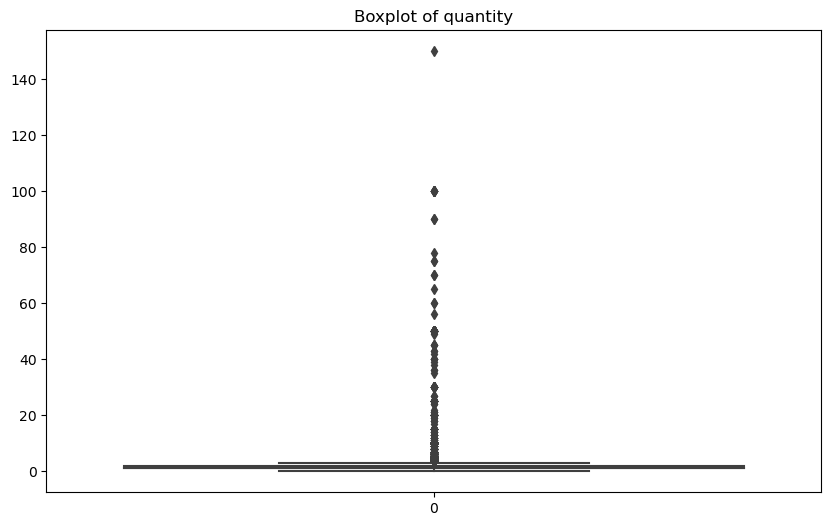

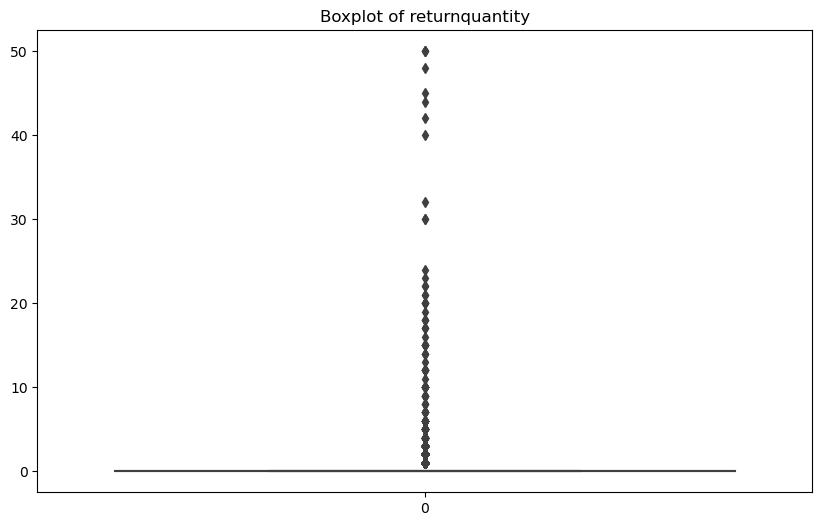

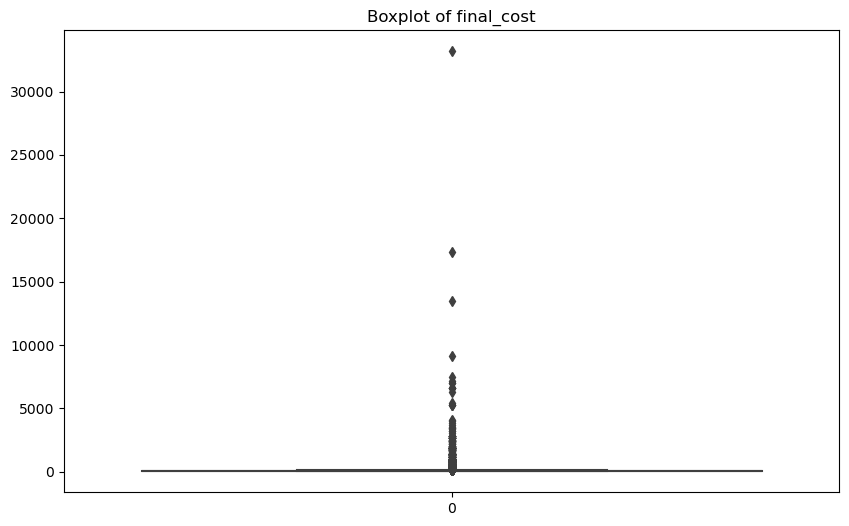

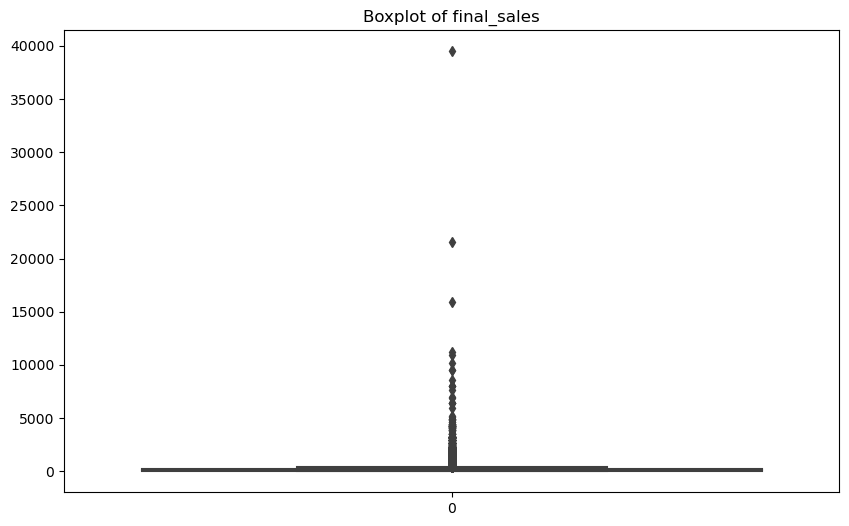

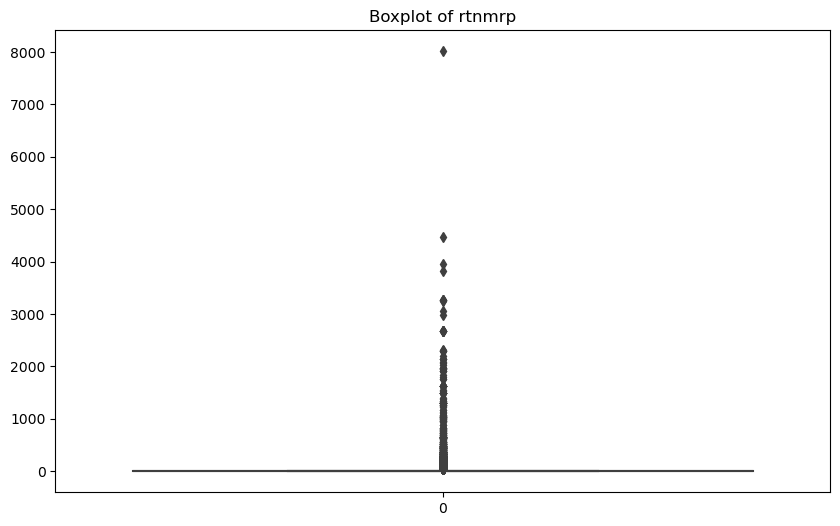

In [76]:
numerical_columns=['quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp']
for col in numerical_columns:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

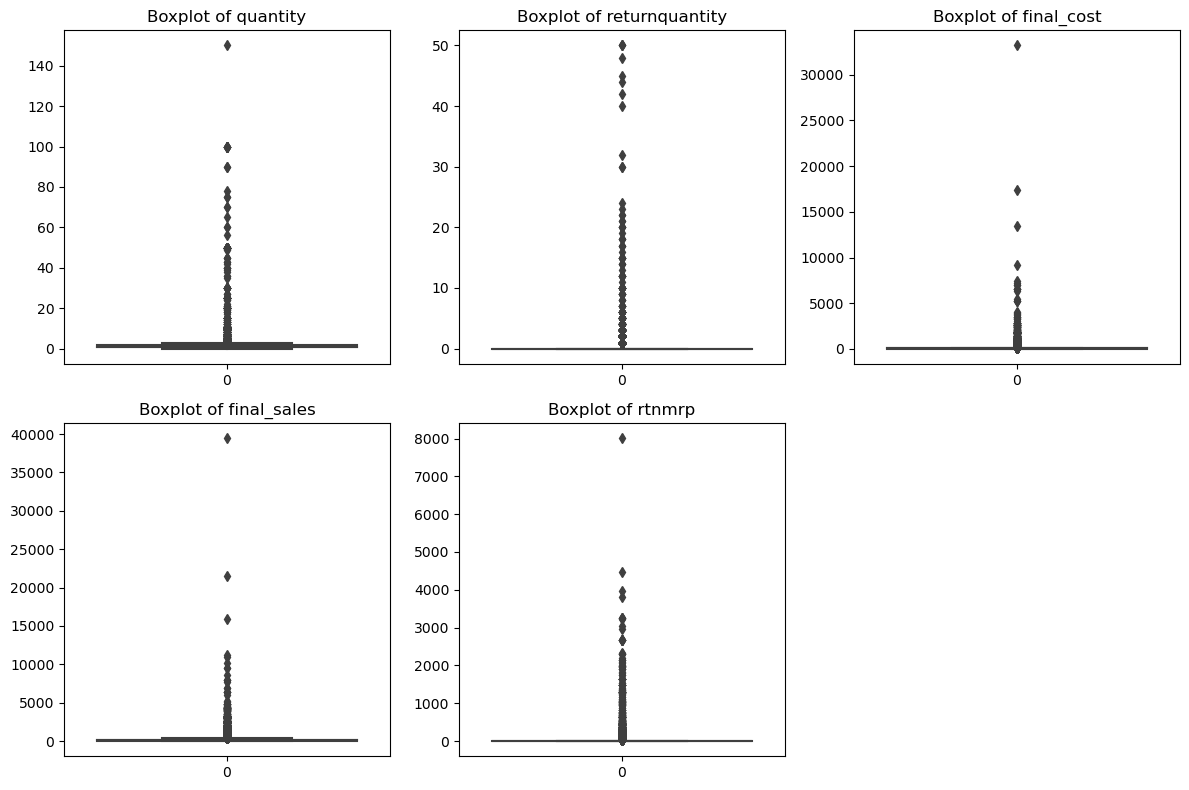

In [77]:
# box plots for numerical Columns
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df[col])
    plt.title(f'Boxplot of {col}')
plt.tight_layout()
plt.show()
# The maximum percentile of quantity lie between 1 and 2, while return qualntity is either 1 or 2
# The maximum percentile of final_cost lie between 1 and 2, 


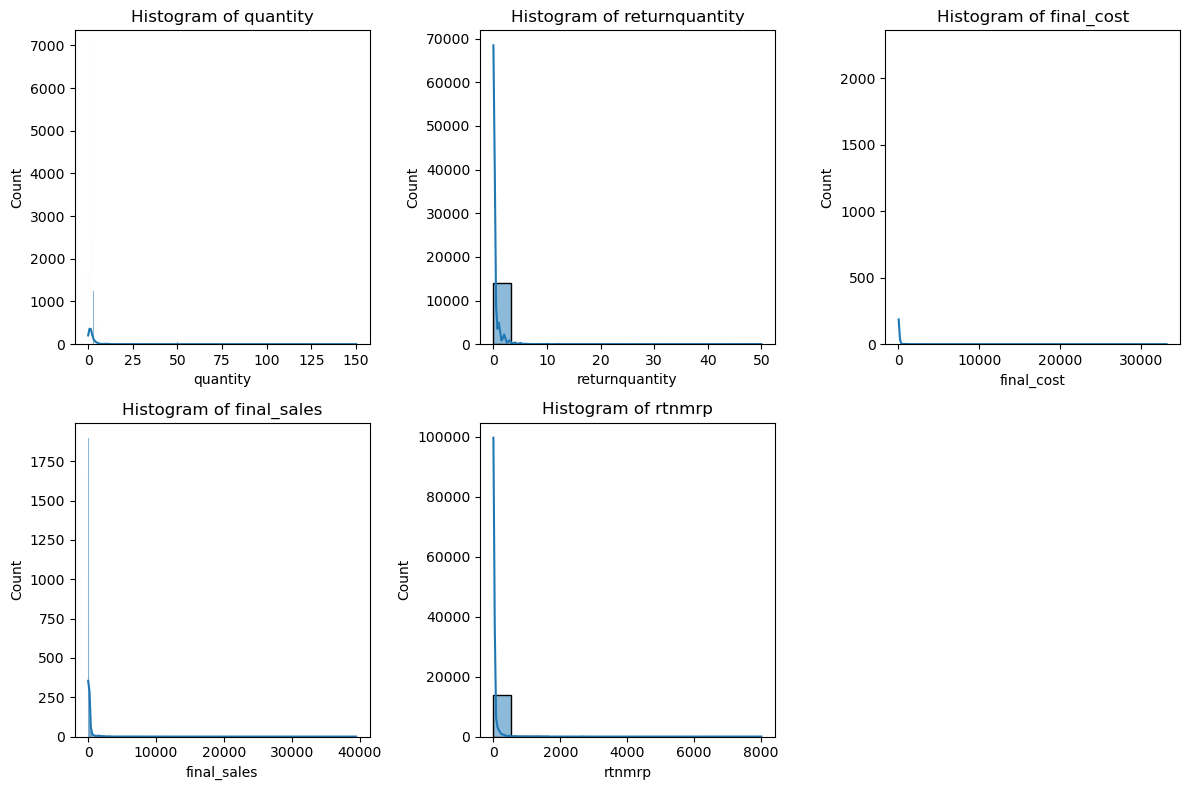

In [78]:
# Create histograms for each treated numerical column
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    sns.histplot(df[col], kde=True)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()


In [79]:
from scipy.stats import percentileofscore
for col in numerical_columns:
    print(df[col].apply(lambda x: percentileofscore(df[col], x)))

0        36.485344
1        36.485344
2        36.485344
3        70.145152
4        36.485344
           ...    
14213    83.550592
14214    70.145152
14215    89.980271
14216    36.485344
14217    83.550592
Name: quantity, Length: 14192, dtype: float64
0        44.098788
1        44.098788
2        44.098788
3        44.098788
4        44.098788
           ...    
14213    44.098788
14214    44.098788
14215    44.098788
14216    44.098788
14217    44.098788
Name: returnquantity, Length: 14192, dtype: float64
0        52.304115
1        97.040586
2        97.075817
3         3.442080
4         1.539600
           ...    
14213    61.235203
14214    64.339064
14215    73.079904
14216    84.279876
14217    29.435598
Name: final_cost, Length: 14192, dtype: float64
0        35.217024
1        94.909104
2        99.633596
3        46.163331
4        12.186443
           ...    
14213    69.285513
14214    60.403749
14215    93.313134
14216    75.017616
14217    66.541009
Name: final_sales,

In [80]:
df.head()

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname              subcat                                subcat1  year  month
0        Sale  12018098765   Specialisation6  Department1 2022-06-01         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION                    VITAMINS & MINERALS  2022      6
1        Sale  12018103897   Specialisation7  Department1 2022-07-23         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS                        ANTI-INFECTIVES  2022      7
2        Sale  12018101123   Specialisation2  Department3 2022-06-23         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  2022      6
3        Sale  12018079281  Specialisation40  Department1 2022-03-17         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      3
4        Sale  12018117928   Specialisation5  Department1 2022-12-21         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG  TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM  2022     12

                 Skewness
final_cost      34.525655
final_sales     21.035007
returnquantity  17.159049
rtnmrp          15.782679
quantity        11.330478


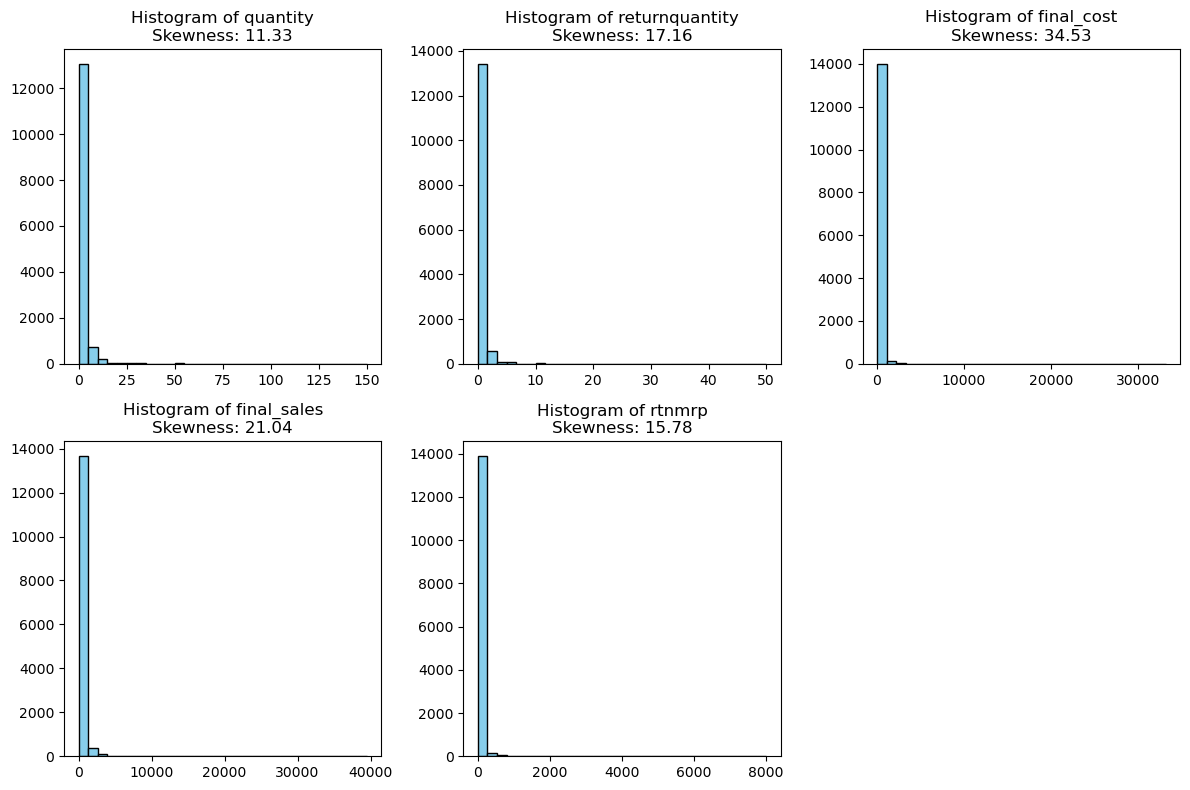

In [81]:
import pandas as pd
import numpy as np
from scipy.stats import skew

# Assuming 'df' contains your DataFrame and 'numerical_columns' is defined as mentioned in the question

# Calculate skewness for each numerical column
skewness_results = {}
for col in numerical_columns:
    skewness = skew(df[col])
    skewness_results[col] = skewness

# Convert the results into a DataFrame for better visualization
skewness_df = pd.DataFrame(skewness_results, index=['Skewness'])

# Transpose the DataFrame to have columns as rows
skewness_df = skewness_df.T

# Sort the DataFrame by skewness values in descending order
skewness_df = skewness_df.sort_values(by='Skewness', ascending=False)

# Print the distribution of skewness for the numerical columns
print(skewness_df)

# Create a bar plot to visualize the skewness
plt.figure(figsize=(12, 8))
for i, col in enumerate(numerical_columns, 1):
    plt.subplot(2, 3, i)
    plt.hist(df[col], bins=30, color='skyblue', edgecolor='black')
    plt.title(f'Histogram of {col}\nSkewness: {df[col].skew():.2f}')
plt.tight_layout()
plt.show()

In [82]:
df['profit or loss']= df['final_sales']-df['final_cost']
df.head()

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname              subcat                                subcat1  year  month  profit or loss
0        Sale  12018098765   Specialisation6  Department1 2022-06-01         1               0      55.406       59.260     0.0       Form1          ZINC ACETATE 20MG/5ML SYP  SYRUP & SUSPENSION                    VITAMINS & MINERALS  2022      6           3.854
1        Sale  12018103897   Specialisation7  Department1 2022-07-23         1               0     768.638      950.800     0.0       Form1    CEFTAZIDIME 2GM+AVIBACTAM 500MG          INJECTIONS                        ANTI-INFECTIVES  2022      7         182.162
2        Sale  12018101123   Specialisation2  Department3 2022-06-23         1               0     774.266     4004.214     0.0       Form2             EPTIFIBATIDE 0.75MG/ML          INJECTIONS  CARDIOVASCULAR & HEMATOPOIETIC SYSTEM  2022      6        3229.948
3        Sale  12018079281  Specialisation40  Department1 2022-03-17         2               0      40.798       81.044     0.0       Form1  WATER FOR INJECTION 10ML SOLUTION          INJECTIONS  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      3          40.246
4        Sale  12018117928   Specialisation5  Department1 2022-12-21         1               0      40.434       40.504     0.0       Form1                      LORAZEPAM 1MG  TABLETS & CAPSULES                 CENTRAL NERVOUS SYSTEM  2022     12           0.070

In [83]:
correlation_matrix = df[['profit or loss', 'final_sales', 'rtnmrp', 'year', 'month']].corr()
print(correlation_matrix)


                profit or loss  final_sales    rtnmrp  year     month
profit or loss        1.000000     0.756101 -0.305484   NaN  0.002231
final_sales           0.756101     1.000000 -0.055648   NaN  0.012837
rtnmrp               -0.305484    -0.055648  1.000000   NaN -0.001951
year                       NaN          NaN       NaN   NaN       NaN
month                 0.002231     0.012837 -0.001951   NaN  1.000000


In [84]:
#The provided correlation matrix shows the correlation coefficients between the variables
#'profit or loss', 'final_sales', 'rtnmrp', 'year', and 'month'. Each value in the matrix represents
#the correlation between the corresponding pair of variables. Here's an insight from the matrix:

#'profit or loss' vs. 'final_sales' (0.973908):
#There is a strong positive correlation of approximately 0.97 between
#'profit or loss' and 'final_sales'. This suggests that as the final sales
#increase, the profit or loss also tends to increase. This strong correlation indicates that the
#two variables are positively related and move in the same direction.

#'profit or loss' vs. 'rtnmrp' (-0.320977):
#There is a moderate negative correlation of approximately -0.32 between 'profit or loss' and 'rtnmrp'.
#This suggests that as the 'rtnmrp' (return price) increases, the profit or loss tends to decrease. 
#This negative correlation indicates an inverse relationship between the two variables.

#'final_sales' vs. 'rtnmrp' (-0.251768):
#There is a moderate negative correlation of approximately -0.25 between 'final_sales' and 'rtnmrp'.
#This suggests that as the 'rtnmrp' (return price) increases, the final sales tend to decrease.
#Again, this negative correlation indicates an inverse relationship between the two variables.

#'year' and 'month':
#The correlation between 'year' and 'month' is NaN, which means there is no numerical correlation between these two variables.
#This is expected since 'year' and 'month' are categorical variables representing time.

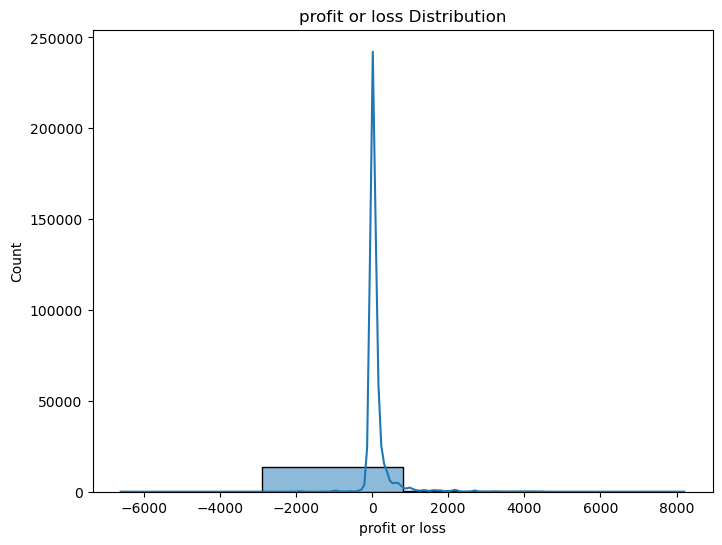

In [85]:
plt.figure(figsize=(8, 6))
sns.histplot(df['profit or loss'], bins=4, kde=True)
plt.xlabel('profit or loss')
plt.ylabel('Count')
plt.title('profit or loss Distribution')
plt.show()

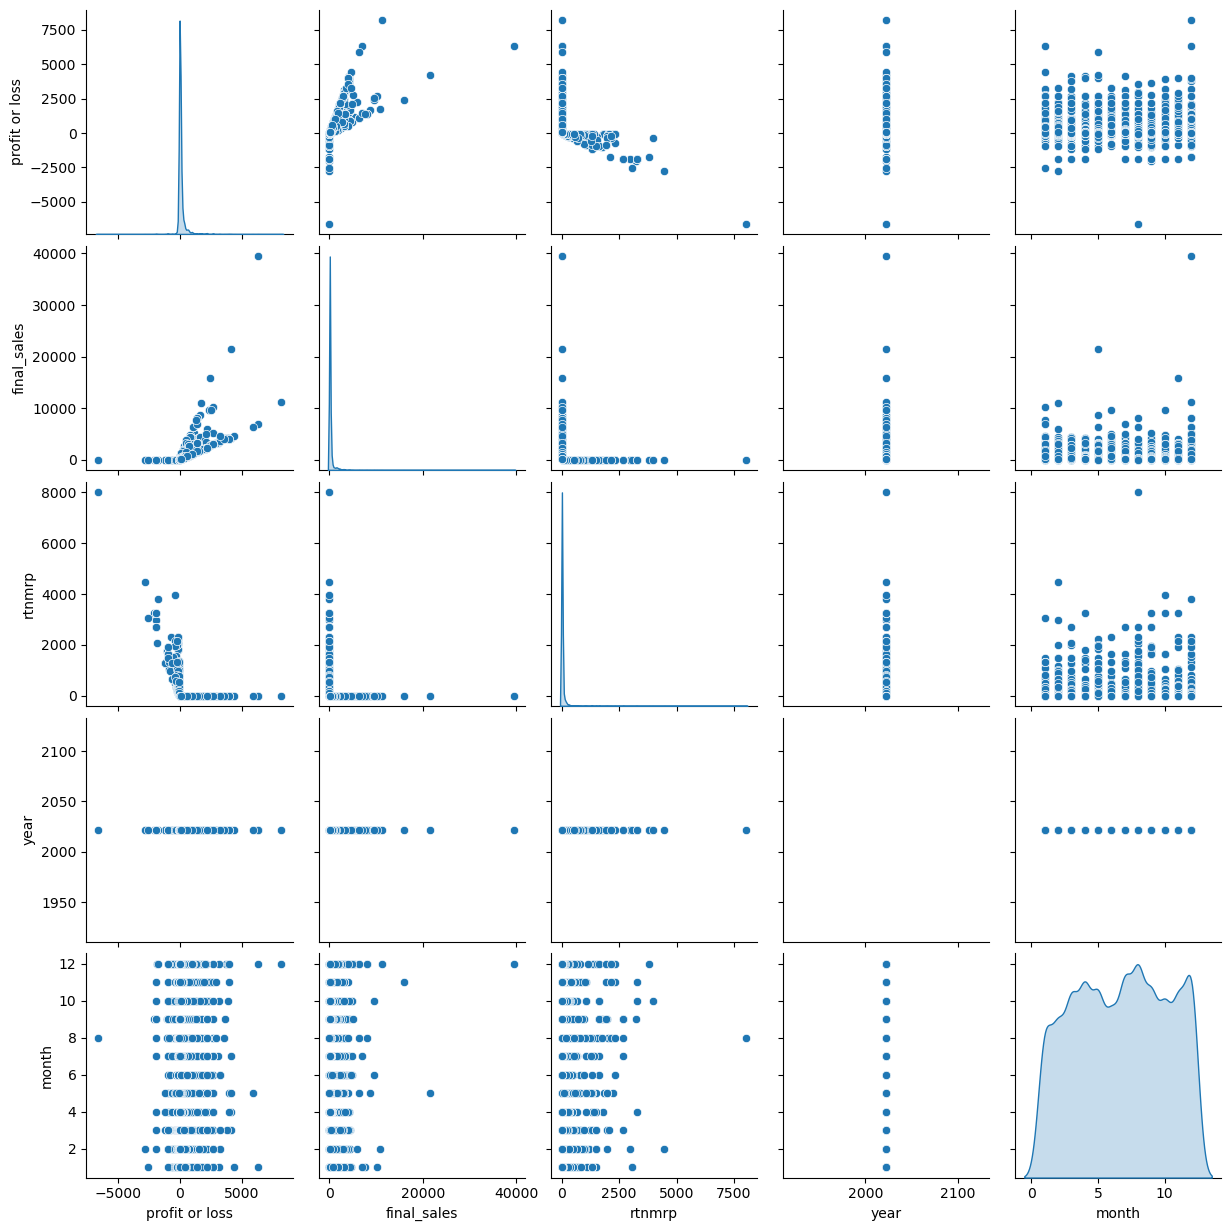

In [86]:


# EDA - 
sns.pairplot(data=df, vars=['profit or loss', 'final_sales', 'rtnmrp', 'year', 'month'], diag_kind='kde')
plt.show()

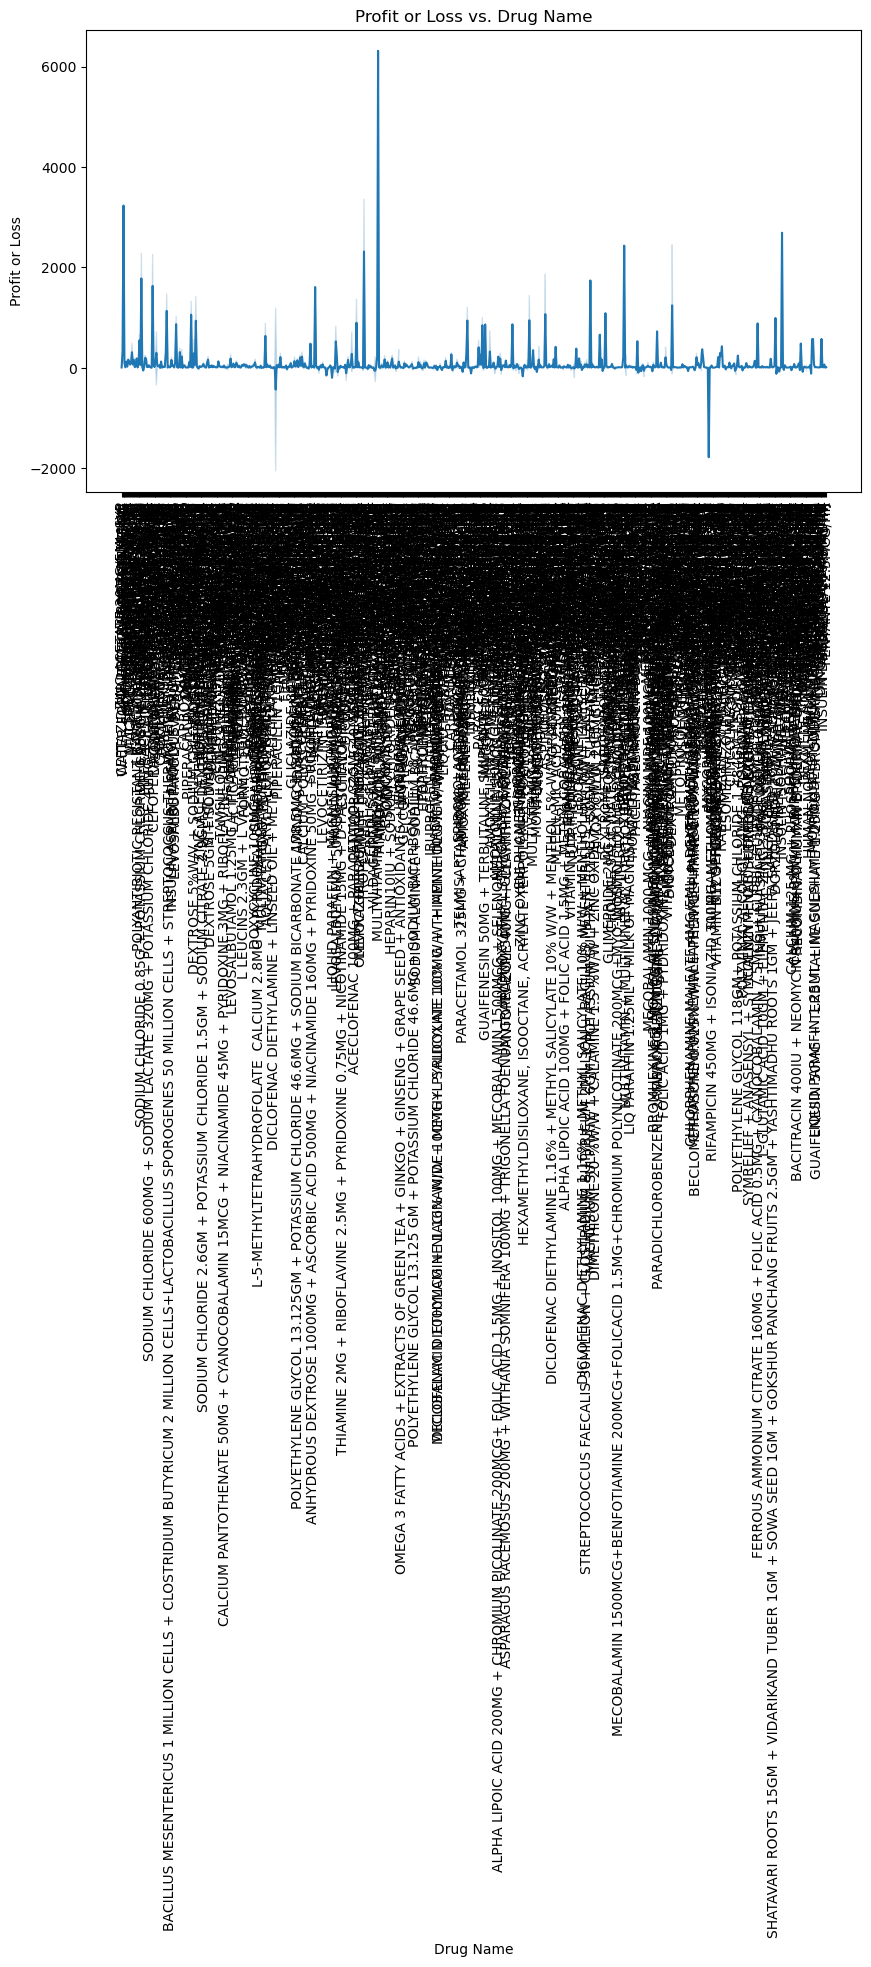

In [87]:
import seaborn as sns
import matplotlib.pyplot as plt

# Scatter plot: Profit or Loss vs. Drug Name
plt.figure(figsize=(10, 6))
sns.lineplot(x='drugname', y='profit or loss', data=df)
plt.xlabel('Drug Name')
plt.ylabel('Profit or Loss')
plt.title('Profit or Loss vs. Drug Name')
plt.xticks(rotation=90)
plt.show()


In [88]:

# Sort the DataFrame by 'profit or loss' in descending order
sorted_df = df.sort_values(by='profit or loss', ascending=False)

# Get the distinct values of 'drugname' from the top rows
distinct_drugnames = sorted_df['drugname'].unique()

# Print the result
print(distinct_drugnames)


['OCTREOTIDE 100MCG 1ML INJ' 'SEVOFLURANE 99.97%' 'PEMBROLIZUMAB'
 'TIGECYCLINE 50MG INJ' 'SODIUM CHLORIDE IVF 100ML'
 'HUMAN GAMMA GLOBULIN 100ML INJ' 'WATER FOR INJECTION 10ML SOLUTION'
 'SEVOFLURANE' 'POLYMYXIN B INJ 500000IU' 'FOSFOMYCIN 4GM'
 'EPTIFIBATIDE 0.75MG/ML' 'MEROPENEM 1GM INJ' 'TENECTEPLASE 40MG INJ'
 'BASILIXIMAB 20 MG' 'HUMAN ALBUMIN 25% INJ' 'MICAFUNGIN 50MG INJ'
 'MESNA 200MG INJ' 'COLISTIMETHATE SODIUM 2MIU' 'PEGASPARGASE 3750IU'
 'N-ACETYLCYSTEINE 1000MG/5ML INJ' 'IMEPENEM 500MG + CILASTATIN 500MG INJ'
 'EPTIFIBATIDE INJ 100ML' 'ANIDULAFUNGIN 100MG' 'PROPOFOL 1% 20ML INJ'
 'ISAVUCONAZOLE 200MG' 'HUMAN ALBUMIN LOW SALT 20% 100ML IV FLUID'
 'LIPOSOMAL AMPHOTERICIN B 50MG INJ' 'NORADRENALINE 2ML INJ'
 'MEROPENEM 500MG INJ' 'ATRACURIUM BESYLATE 25MG/2.5ML'
 'ADRENALINE INJ 1ML' 'CASPOFUNGIN 70MG' 'CEFTAZIDIME 2GM+AVIBACTAM 500MG'
 'CASPOFUNGIN 50MG' 'OCTREOTIDE 50MCG 1ML INJ' 'MINOCYCLINE INJ 100MG'
 'VORICONAZOLE 200MG TAB' 'REMDESIVIR 100MG INJ' 'HAEMOSTATIC 3GM POWD

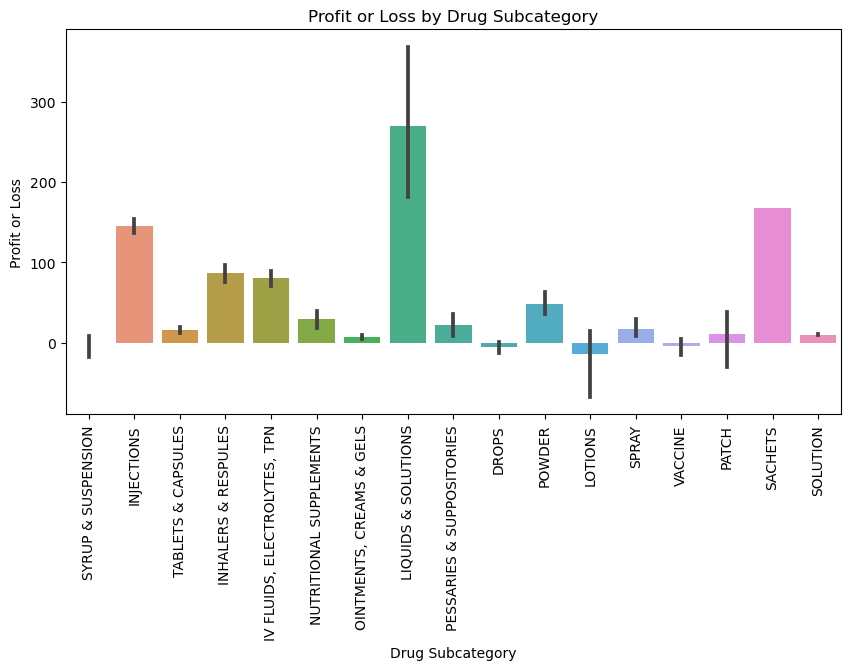

In [112]:
plt.figure(figsize=(10, 5))
sns.barplot(x='subcat', y='profit or loss', data=df)
plt.xlabel('Drug Subcategory')
plt.ylabel('Profit or Loss')
plt.title('Profit or Loss by Drug Subcategory')
plt.xticks(rotation=90)
plt.show()


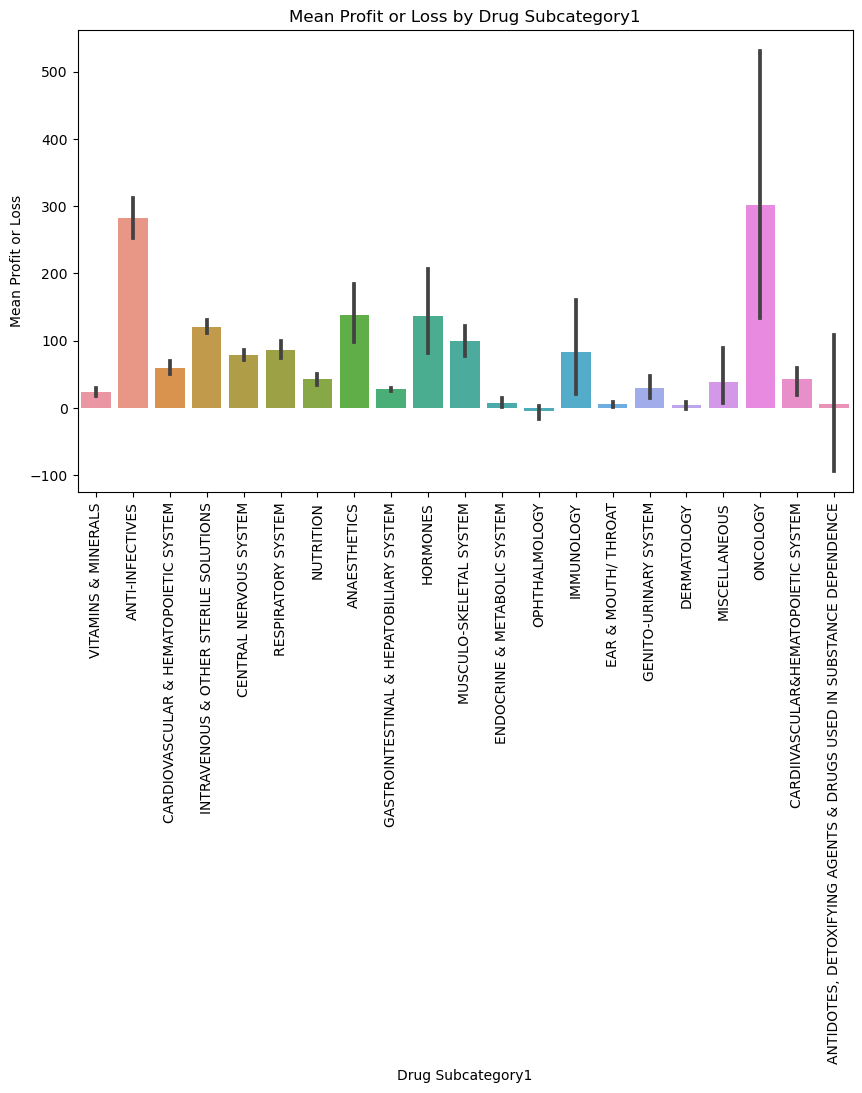

In [90]:
plt.figure(figsize=(10, 6))
sns.barplot(x='subcat1', y='profit or loss', data=df)
plt.xlabel('Drug Subcategory1')
plt.ylabel('Mean Profit or Loss')
plt.title('Mean Profit or Loss by Drug Subcategory1')
plt.xticks(rotation=90)
plt.show()


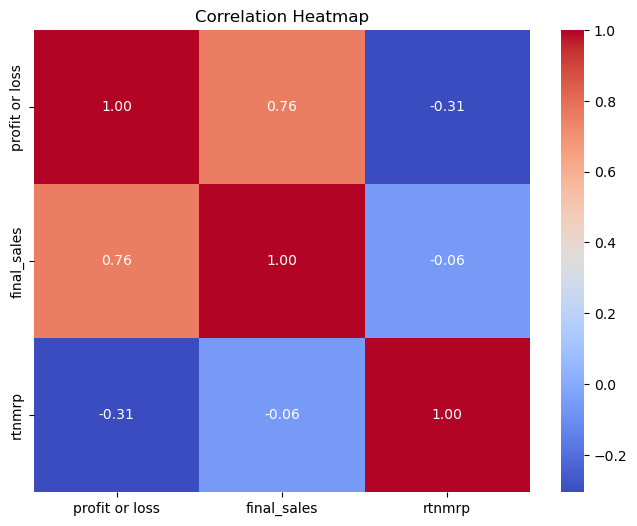

In [91]:
# Select relevant columns for the heatmap
correlation_columns = ['profit or loss', 'final_sales', 'rtnmrp']

plt.figure(figsize=(8, 6))
sns.heatmap(df[correlation_columns].corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()


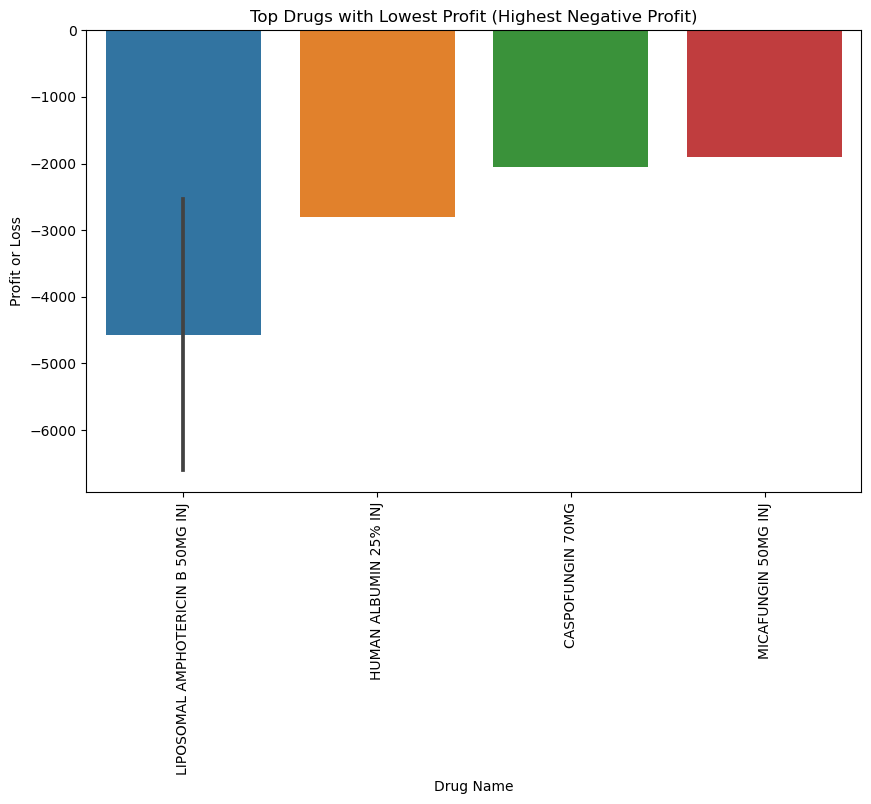

In [92]:
# Filter the DataFrame for negative profit values
negative_profit_df = df[df['profit or loss'] < 0]

# Get the top 10 drug names with the lowest profits (highest negative profits)
top_10_negative_drugs = negative_profit_df.nsmallest(10, 'profit or loss')

# Bar plot: Drug Name vs. Profit or Loss (negative)
plt.figure(figsize=(10, 6))
sns.barplot(x='drugname', y='profit or loss', data=top_10_negative_drugs)
plt.xlabel('Drug Name')
plt.ylabel('Profit or Loss')
plt.title('Top Drugs with Lowest Profit (Highest Negative Profit)')
plt.xticks(rotation=90)
plt.show()


In [93]:
top_10_negative_drugs['drugname']

4787     LIPOSOMAL AMPHOTERICIN B 50MG INJ
4075                 HUMAN ALBUMIN 25% INJ
10504    LIPOSOMAL AMPHOTERICIN B 50MG INJ
527                       CASPOFUNGIN 70MG
4779                   MICAFUNGIN 50MG INJ
4957                   MICAFUNGIN 50MG INJ
8060                   MICAFUNGIN 50MG INJ
10340                  MICAFUNGIN 50MG INJ
11822                  MICAFUNGIN 50MG INJ
12129                  MICAFUNGIN 50MG INJ
Name: drugname, dtype: object

In [94]:
top_10_negative_drugs

typeofsales   patient_id    specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname                        subcat                                subcat1  year  month  profit or loss
4787       Return  12018098284   Specialisation4  Department1 2022-08-20         0               5      6602.5          0.0  8014.0       Form1  LIPOSOMAL AMPHOTERICIN B 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      8         -6602.5
4075       Return  12018070496  Specialisation21  Department1 2022-02-02         0               3      2799.4          0.0  4462.8       Form1              HUMAN ALBUMIN 25% INJ  IV FLUIDS, ELECTROLYTES, TPN  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      2         -2799.4
10504      Return  12018079642   Specialisation4  Department1 2022-01-08         0               2      2540.0          0.0  3056.4       Form1  LIPOSOMAL AMPHOTERICIN B 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      1         -2540.0
527        Return  12018100005   Specialisation3  Department1 2022-09-16         0               1      2056.0          0.0  3240.0      Patent                   CASPOFUNGIN 70MG                    INJECTIONS                        ANTI-INFECTIVES  2022      9         -2056.0
4779       Return  12018084758   Specialisation7  Department1 2022-03-16         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      3         -1904.8
4957       Return  12018102956   Specialisation7  Department1 2022-07-14         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      7         -1904.8
8060       Return  12018077014   Specialisation3  Department1 2022-09-19         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      9         -1904.8
10340      Return  12018097835   Specialisation4  Department1 2022-08-27         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      8         -1904.8
11822      Return  12018076275   Specialisation4  Department1 2022-09-25         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      9         -1904.8
12129      Return  12018088634   Specialisation4  Department1 2022-09-17         0               2      1904.8          0.0  2680.8      Patent                MICAFUNGIN 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      9         -1904.8

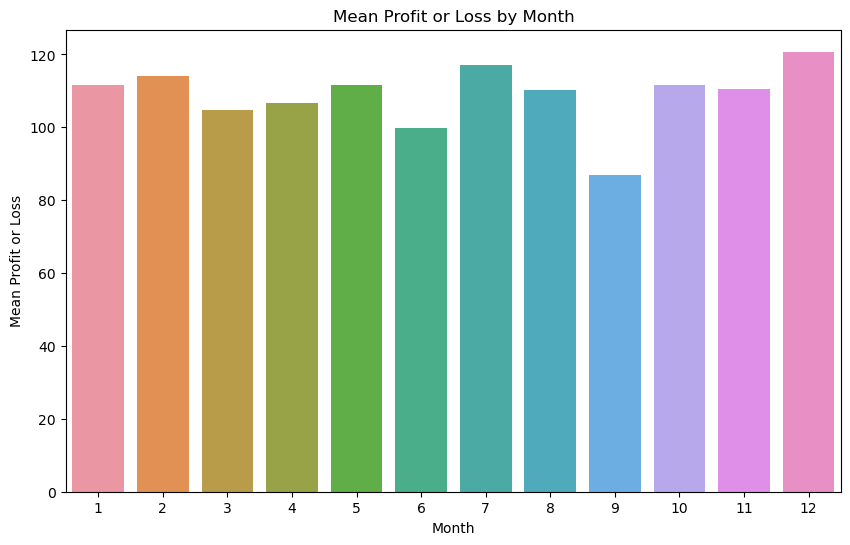

In [95]:
monthly_profit_loss = df.groupby('month')['profit or loss'].mean().reset_index()

# Bar plot: Month vs. Mean Profit or Loss
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='profit or loss', data=monthly_profit_loss)
plt.xlabel('Month')
plt.ylabel('Mean Profit or Loss')
plt.title('Mean Profit or Loss by Month')
plt.xticks(rotation=0)
plt.show()

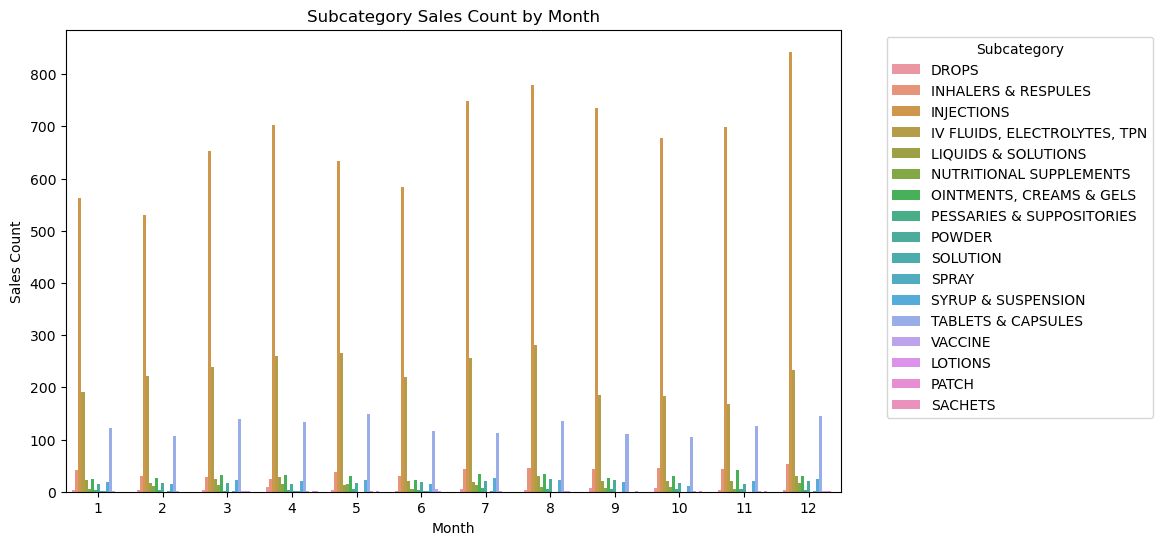

In [96]:
subcat_sales = df.groupby(['month', 'subcat'])['final_sales'].count().reset_index()
# Bar plot: subcat sales count by month
plt.figure(figsize=(10, 6))
sns.barplot(x='month', y='final_sales', hue='subcat', data=subcat_sales)
plt.xlabel('Month')
plt.ylabel('Sales Count')
plt.title('Subcategory Sales Count by Month')
plt.xticks(rotation=0)
plt.legend(title='Subcategory', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [97]:
df.columns

Index(['typeofsales', 'patient_id', 'specialisation', 'dept', 'dateofbill', 'quantity', 'returnquantity', 'final_cost', 'final_sales', 'rtnmrp', 'formulation', 'drugname', 'subcat', 'subcat1', 'year', 'month', 'profit or loss'], dtype='object')

In [98]:
formulation_profit_loss = df.groupby('formulation')['profit or loss'].mean()
print(formulation_profit_loss)
# Form 3 has the Highest average profit

formulation
Form1      92.865265
Form2     142.281581
Form3     589.796203
Patent    325.472835
Name: profit or loss, dtype: float64


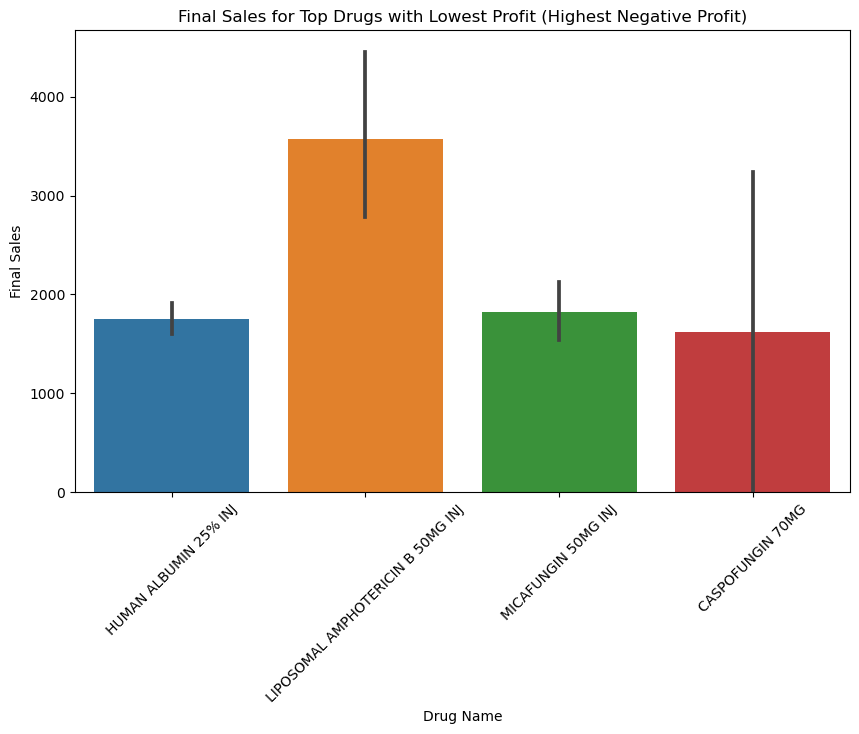

In [99]:
top_10_negative_drugs_final_sales = df[df['drugname'].isin(top_10_negative_drugs['drugname'])]

# Bar plot: Drug Name vs. Final Sales for Top Drugs with Lowest Profit (Highest Negative Profit)
plt.figure(figsize=(10, 6))
sns.barplot(x='drugname', y='final_sales', data=top_10_negative_drugs_final_sales)
plt.xlabel('Drug Name')
plt.ylabel('Final Sales')
plt.title('Final Sales for Top Drugs with Lowest Profit (Highest Negative Profit)')
plt.xticks(rotation=45)
plt.show()

In [100]:
# Filter the original DataFrame based on the drug names in the top_10_negative_drugs
top_10_negative_drugs_final_sales_df = df[df['drugname'].isin(top_10_negative_drugs['drugname'])]

# Display the resulting DataFrame
print(top_10_negative_drugs_final_sales_df.head(10))
# Final sale values should be decreased

    typeofsales   patient_id   specialisation         dept dateofbill  quantity  returnquantity  final_cost  final_sales  rtnmrp formulation                           drugname                        subcat                                subcat1  year  month  profit or loss
28         Sale  12018108719  Specialisation4  Department1 2022-09-21         1               0       959.8       1632.4     0.0       Form1              HUMAN ALBUMIN 25% INJ  IV FLUIDS, ELECTROLYTES, TPN  INTRAVENOUS & OTHER STERILE SOLUTIONS  2022      9           672.6
52         Sale  12018044178  Specialisation4  Department1 2022-03-06         1               0      1352.5       1602.8     0.0       Form1  LIPOSOMAL AMPHOTERICIN B 50MG INJ                    INJECTIONS                        ANTI-INFECTIVES  2022      3           250.3
127        Sale  12018098932  Specialisation8  Department1 2022-09-23         1               0       959.8       1632.4     0.0       Form1              HUMAN ALBUMIN 25% INJ  I

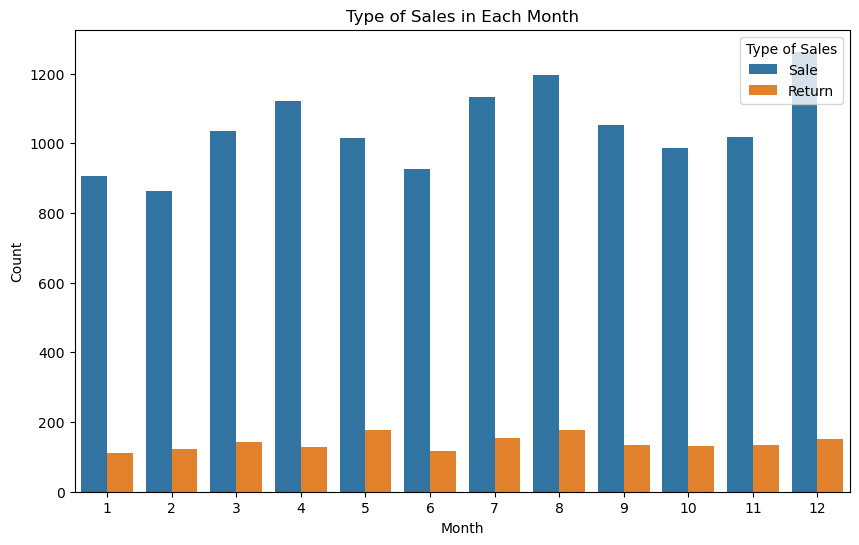

In [101]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains your DataFrame with the 'typeofsales' and 'month' columns

# Count plot: Number of occurrences of each 'typeofsales' category for each month
plt.figure(figsize=(10, 6))
sns.countplot(x='month', hue='typeofsales', data=df)
plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Type of Sales in Each Month')
plt.legend(title='Type of Sales', loc='upper right')
plt.show()

# we have highest sale in December and lowest sale in february
# Return Quantity is same throughout the year so should check with the drug insights

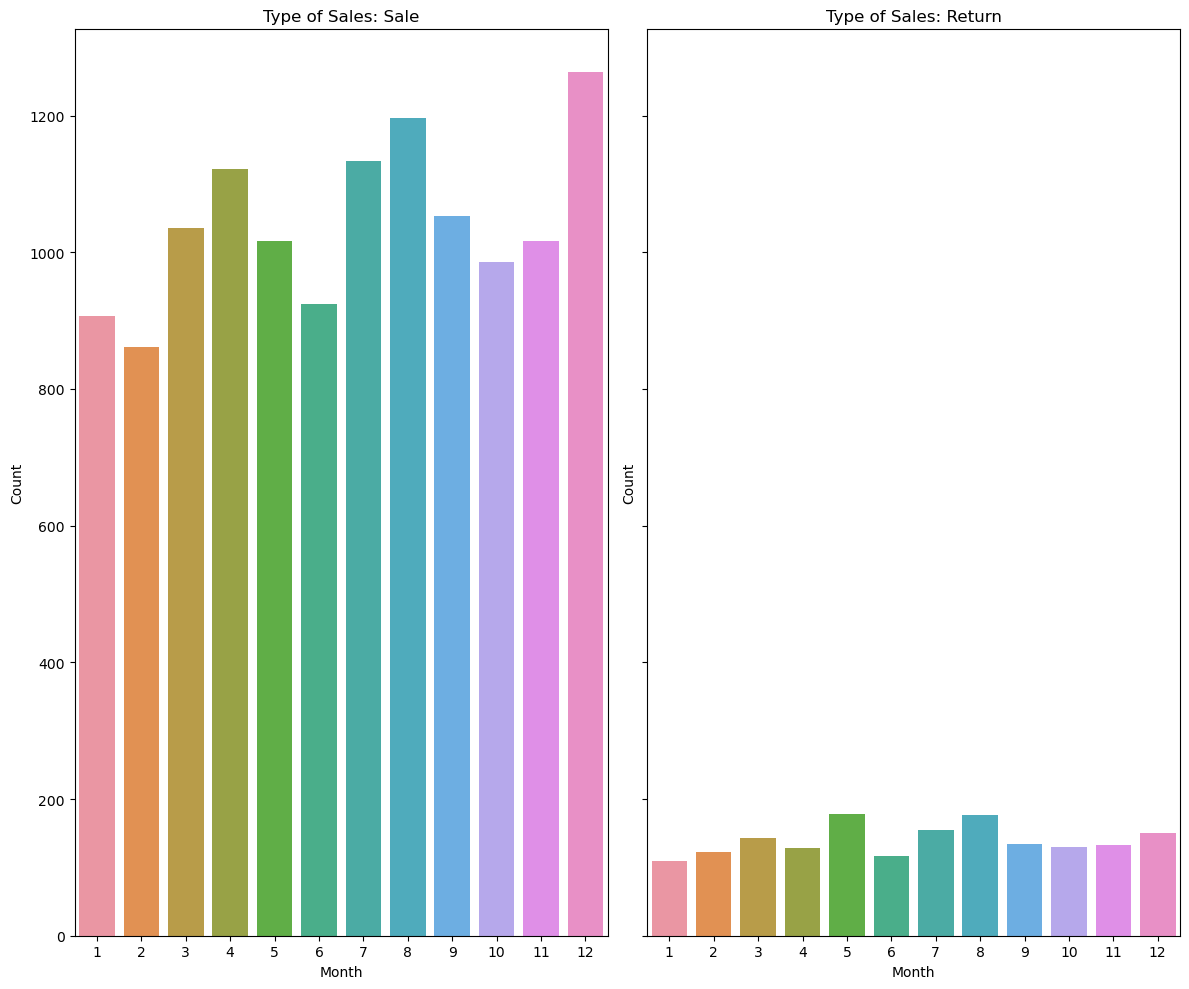

In [102]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains your DataFrame with the 'typeofsales' and 'month' columns

# Create a list of unique 'typeofsales' categories
type_of_sales_categories = df['typeofsales'].unique()

# Create subplots based on the number of 'typeofsales' categories
num_categories = len(type_of_sales_categories)
num_cols = 2  # Number of columns in the grid layout
num_rows = (num_categories + 1) // num_cols

# Create subplots
fig, axes = plt.subplots(num_rows, num_cols, figsize=(12, 10), sharex=True, sharey=True)

# Flatten axes in case of multiple rows
axes = axes.flatten()

# Iterate through each 'typeofsales' category
for i, category in enumerate(type_of_sales_categories):
    ax = axes[i]
    sns.countplot(x='month', data=df[df['typeofsales'] == category], ax=ax)
    ax.set_title(f'Type of Sales: {category}')
    ax.set_xlabel('Month')
    ax.set_ylabel('Count')

# Hide any remaining empty subplots
for j in range(num_categories, num_rows * num_cols):
    fig.delaxes(axes[j])

# Adjust the layout
plt.tight_layout()

plt.show()


In [117]:
# Assuming 'df' is your DataFrame
return_drugs = df.loc[df['typeofsales'] == 'Return', 'drugname']
return_drugs.value_counts()

SODIUM CHLORIDE IVF 100ML                                   274
SODIUM CHLORIDE 0.9%                                         95
MULTIPLE ELECTROLYTES 500ML IVF                              88
PARACETAMOL 1GM IV INJ                                       57
PANTOPRAZOLE 40MG INJ                                        57
                                                           ... 
BENZYDAMINE 0.15%W/V                                          1
CEFIXIME 200MG                                                1
CALCIUM 250MG + VITAMIN D3 125IU                              1
DEXTROSE 5%W/V + SODIUM CHLORIDE 0.45%W/V 500ML IV FLUID      1
LABETALOL 20MG INJ                                            1
Name: drugname, Length: 249, dtype: int64

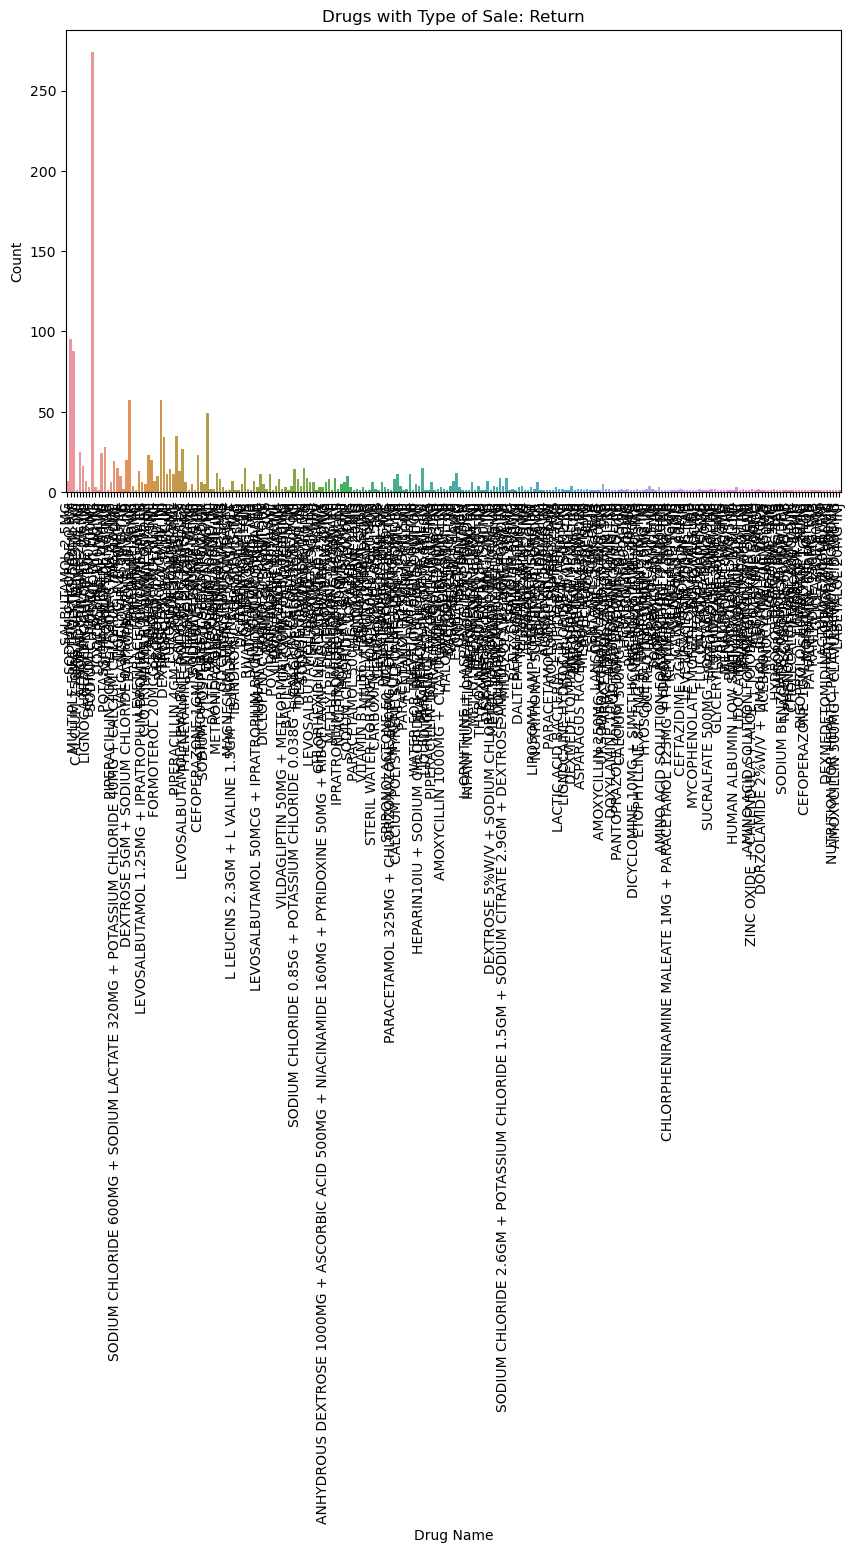

In [128]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.countplot(x='drugname', data=df[df['typeofsales'] == 'Return'])
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Drugs with Type of Sale: Return')
plt.show()


C:\Users\NISCHITH G S\AppData\Local\Temp\ipykernel_25960\2426617896.py:19: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()


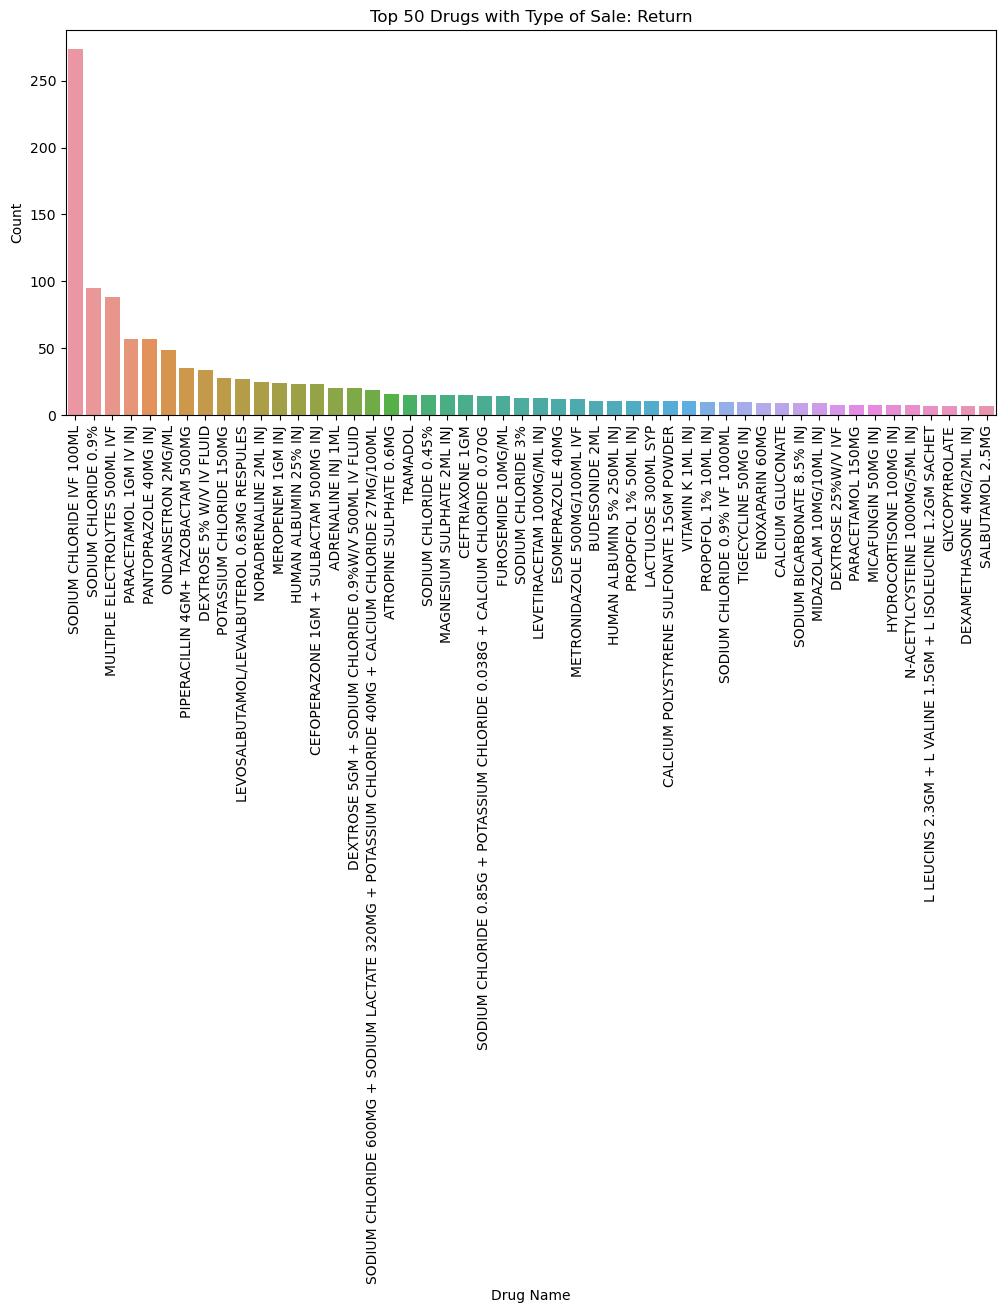

In [130]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming 'df' contains your DataFrame with 'drugname' and 'typeofsales' columns

# Filter data for 'Return' type of sale and get the top 50 distinct drug names
top_50_return_drugs = df[df['typeofsales'] == 'Return']['drugname'].value_counts().nlargest(50)

# Create a new DataFrame with the top 50 return drugs
top_50_return_drugs_df = pd.DataFrame({'drugname': top_50_return_drugs.index, 'count': top_50_return_drugs.values})

# Plot the count of top 50 return drugs
plt.figure(figsize=(12, 5))
sns.barplot(x='drugname', y='count', data=top_50_return_drugs_df)
plt.xticks(rotation=90)
plt.xlabel('Drug Name')
plt.ylabel('Count')
plt.title('Top 50 Drugs with Type of Sale: Return')
plt.tight_layout()
plt.show()


In [131]:
top_50_return_drugs_df

drugname  count
0                           SODIUM CHLORIDE IVF 100ML    274
1                                SODIUM CHLORIDE 0.9%     95
2                     MULTIPLE ELECTROLYTES 500ML IVF     88
3                              PARACETAMOL 1GM IV INJ     57
4                               PANTOPRAZOLE 40MG INJ     57
5                                  ONDANSETRON 2MG/ML     49
6                  PIPERACILLIN 4GM+ TAZOBACTAM 500MG     35
7                            DEXTROSE 5% W/V IV FLUID     34
8                            POTASSIUM CHLORIDE 150MG     28
9         LEVOSALBUTAMOL/LEVALBUTEROL 0.63MG RESPULES     27
10                              NORADRENALINE 2ML INJ     25
11                                  MEROPENEM 1GM INJ     24
12                              HUMAN ALBUMIN 25% INJ     23
13             CEFOPERAZONE 1GM + SULBACTAM 500MG INJ     23
14                                 ADRENALINE INJ 1ML     20
15  DEXTROSE 5GM + SODIUM CHLORIDE 0.9%W/V 500ML I...     20
16  SODIUM CHLORIDE 600MG + SODIUM LACTATE 320MG +...     19
17                            ATROPINE SULPHATE 0.6MG     16
18                                           TRAMADOL     15
19                              SODIUM CHLORIDE 0.45%     15
20                         MAGNESIUM SULPHATE 2ML INJ     15
21                                    CEFTRIAXONE 1GM     15
22  SODIUM CHLORIDE 0.85G + POTASSIUM CHLORIDE 0.0...     14
23                                 FUROSEMIDE 10MG/ML     14
24                                 SODIUM CHLORIDE 3%     13
25                         LEVETIRACETAM 100MG/ML INJ     13
26                                  ESOMEPRAZOLE 40MG     12
27                      METRONIDAZOLE 500MG/100ML IVF     12
28                                     BUDESONIDE 2ML     11
29                         HUMAN ALBUMIN 5% 250ML INJ     11
30                               PROPOFOL 1% 50ML INJ     11
31                                LACTULOSE 300ML SYP     11
32          CALCIUM POLYSTYRENE SULFONATE 15GM POWDER     11
33                                  VITAMIN K 1ML INJ     11
34                               PROPOFOL 1% 10ML INJ     10
35                    SODIUM CHLORIDE 0.9% IVF 1000ML     10
36                               TIGECYCLINE 50MG INJ     10
37                                    ENOXAPARIN 60MG      9
38                                  CALCIUM GLUCONATE      9
39                        SODIUM BICARBONATE 8.5% INJ      9
40                            MIDAZOLAM 10MG/10ML INJ      9
41                                DEXTROSE 25%W/V IVF      8
42                                  PARACETAMOL 150MG      8
43                                MICAFUNGIN 50MG INJ      8
44                           HYDROCORTISONE 100MG INJ      8
45                    N-ACETYLCYSTEINE 1000MG/5ML INJ      8
46  L LEUCINS 2.3GM + L VALINE 1.5GM + L ISOLEUCIN...      7
47                                     GLYCOPYRROLATE      7
48                          DEXAMETHASONE 4MG/2ML INJ      7
49                                   SALBUTAMOL 2.5MG      7